### Analyse home use of robotic device


*import libraries*

In [1]:
import os
import sys
import sqlite3 as sl

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

import math
import statistics
import scipy.stats

from functools import reduce
import dataframe_image as dfi
from string import ascii_lowercase
import itertools
import chime
%load_ext chime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_rows = 500

In [1]:
os.getcwd()

In [5]:
start_codes=datetime.now()

**import df from sorted time gameplay**

In [6]:
# df = pd.read_csv('./data/P001_df_gameplay.csv')
df = pd.read_hdf('./data/P001_df_gameplay.h5','df')
df_targets = pd.read_csv('./data/P001_targets.csv')

In [2]:
df.head()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402483 entries, 0 to 1412340
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   index               1402483 non-null  int64         
 1   PatientID           1402483 non-null  object        
 2   SessionID           1402483 non-null  object        
 3   GameID              1402483 non-null  int64         
 4   TimeStampDate       1402483 non-null  object        
 5   TimeStampMS         1402483 non-null  int64         
 6   Sparc               1402483 non-null  float64       
 7   VisualTargetXCoord  1402483 non-null  float64       
 8   VisualTargetYCoord  1402483 non-null  float64       
 9   TargetXCoord        1402483 non-null  float64       
 10  TargetYCoord        1402483 non-null  float64       
 11  XCoordinate         1402483 non-null  float64       
 12  YCoordinate         1402483 non-null  float64       
 13  KxGain      

In [3]:
df_targets.head()

*patient dictionary*

In [10]:
# %%hide user_id_dict = { }; 


*convert date_time*

In [11]:
df['date_time'] = pd.to_datetime(df['TimeStampDate'], format='%Y-%m-%d %H:%M:%S')

*GameID*

In [12]:
# %%hide game_id_dict = { }; 


In [13]:
# check types of games played
df['GameID'].unique()

array([0, 1, 2], dtype=int64)

In [14]:
# make copy of original df
df1 = df.reset_index()

### EDA

**declare path for saving fig**
<br> path/folder will change later, and declared again later

In [15]:
patientid = df['PatientID'].unique()[0]
if type(patientid) != str:
    patientid = '00' + df['PatientID'].unique()[0].astype(str)
    
main_results_path = os.path.join('data', 'results', patientid)
if not os.path.exists(main_results_path):
    os.makedirs(main_results_path)

*create dataframe*

In [16]:
# updated list_gameplay
list_gameplay = df1[df1['SessionID'].notna()]['SessionID'].unique()

df_gameplay = []
for gameplay in list_gameplay:
    temp = df1[df1['SessionID']==gameplay]  
    df_gameplay.append(temp)

In [17]:
# nr of new gameplays after split 
len(df_gameplay)

17

In [18]:
gameplay_nr = []
game_nr = []
start = []
end = []
diff = []
for gameplay, df_list in enumerate(df_gameplay):
    for game in range(0,3):
        if game in df_list['GameID'].unique():
            gameplay_nr.append(gameplay)
            game_nr.append(game)
            temp = df_list[df_list['GameID']==game]
            
            start.append(temp['date_time'].iloc[0])
            end.append(temp['date_time'].iloc[-1])
            time_diff = (temp['date_time'].iloc[-1]) - (temp['date_time'].iloc[0])
            diff.append(time_diff/ np.timedelta64(1,'m'))    # in minutes
        

In [19]:
# put in df
time_gameplay = []
for row in range(0,len(gameplay_nr)):
    time_gameplay.append(row)
time_gameplay = pd.DataFrame(time_gameplay,columns=['gameplay_nr'])   
time_gameplay['gameplay_nr'] = gameplay_nr
time_gameplay['game_nr'] = game_nr
time_gameplay['start'] = start
time_gameplay['end'] = end
time_gameplay['diff'] = diff  # in minutes
time_gameplay['just_date'] = time_gameplay['start'].dt.date

In [20]:
time_gameplay

,gameplay_nr,game_nr,start,end,diff,just_date
0,0,0,2022-03-11 12:01:27,2022-03-11 12:11:23,9.933333,2022-03-11
1,1,0,2022-03-11 16:45:13,2022-03-11 16:53:24,8.183333,2022-03-11
2,1,1,2022-03-11 16:57:55,2022-03-11 17:02:56,5.016667,2022-03-11
3,1,2,2022-03-11 17:05:17,2022-03-11 17:10:28,5.183333,2022-03-11
4,2,0,2022-03-11 16:53:24,2022-03-11 16:56:49,3.416667,2022-03-11
5,3,0,2022-03-12 11:17:15,2022-03-12 11:27:31,10.266667,2022-03-12
6,4,1,2022-03-12 11:31:28,2022-03-12 11:41:32,10.066667,2022-03-12
7,4,2,2022-03-12 11:43:06,2022-03-12 11:53:14,10.133333,2022-03-12
8,5,0,2022-03-12 16:09:13,2022-03-12 16:19:32,10.316667,2022-03-12
9,5,1,2022-03-12 16:21:49,2022-03-12 16:31:58,10.150000,2022-03-12


In [21]:
# dfi.export(time_gameplay,"time_gameplay.png")
# dfi.export(time_gameplay[time_gameplay['game_nr']==0],"time_explore.png")
# dfi.export(time_gameplay[time_gameplay['game_nr']==1],"time_fish.png")
# dfi.export(time_gameplay[time_gameplay['game_nr']==2],"time_drone.png")

In [22]:
# save df to csv
pd.DataFrame(time_gameplay).to_csv('./data/P' + patientid + '_time_gameplay.csv')

#### number of targets (from GSM table)

In [4]:
df_targets.sort_values('CreatedDate')

In [24]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientID        24 non-null     object 
 1   CreatedDate      24 non-null     object 
 2   SessionID        24 non-null     object 
 3   Score            24 non-null     float64
 4   Strength         24 non-null     float64
 5   Coordination     24 non-null     float64
 6   Agility          24 non-null     float64
 7   SessionTime      24 non-null     float64
 8   NumberOfTargets  24 non-null     int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 1.8+ KB


In [25]:
df_targets.replace({'PatientID':user_id_dict},inplace=True)
df_targets['date_time'] = pd.to_datetime(df_targets['CreatedDate'], format='%Y-%m-%d %H:%M:%S')
df_targets['just_date'] = df_targets['date_time'].dt.date

In [26]:
gsm_groupgameplay = df_targets.groupby(['just_date']).sum().reset_index()
gsm_groupgameplay

,just_date,Score,Strength,Coordination,Agility,SessionTime,NumberOfTargets
0,2022-03-03,2211.0,175.828728,161.011024,-1228.960854,33.197168,491
1,2022-03-10,2934.0,173.929615,167.369573,-233.032904,51.714651,654
2,2022-03-11,219.0,20.769230,47.588621,20.684547,10.493445,105
3,2022-03-12,4042.0,175.223047,151.330928,73.707095,61.658001,878
4,2022-03-15,2301.0,158.976776,149.103749,-524.591759,31.536377,467
5,2022-03-17,2476.0,53.779697,49.239704,-814.104143,1346.632446,562
6,2022-03-21,3462.0,150.215042,104.382799,29.691547,51.542343,671
7,2022-03-22,2078.0,70.103806,48.287907,-327.145745,32.187260,409
8,2022-03-23,1949.0,76.688744,48.094645,23.666030,31.400736,402
9,2022-03-24,920.0,352.603004,209.353268,-1823.030661,20.182383,193


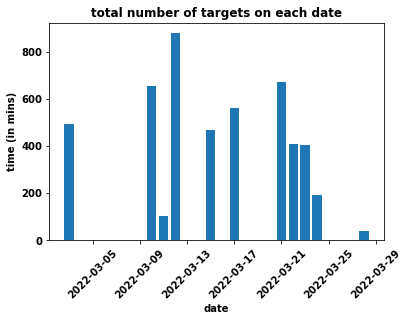

In [27]:
# plot number of targets by date
plt.bar(gsm_groupgameplay['just_date'],gsm_groupgameplay['NumberOfTargets']);
plt.xlabel('date')
plt.xticks(rotation=45)
# plt.yticks(range(0,20))
# plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.ylabel('time (in mins)');
# plt.ylim(top=1000)
plt.title('total number of targets on each date');

plt.savefig(main_results_path + '\\gsm_total_targets_date.png',bbox_inches = "tight")
plt.show();

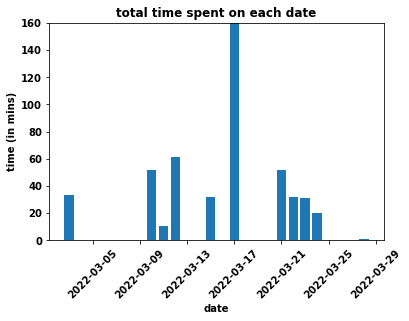

In [28]:
# plot total time spent by date
plt.bar(gsm_groupgameplay['just_date'],gsm_groupgameplay['SessionTime']);
plt.xlabel('date')
plt.xticks(rotation=45)
# plt.yticks(range(0,20))
# plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.ylabel('time (in mins)');
plt.ylim(top=160)
plt.title('total time spent on each date');

plt.savefig(main_results_path + '\\gsm_total_time_date.png',bbox_inches = "tight")
plt.show();

#### time duration


##### time spend per gameplay

In [29]:
time_groupgameplay = time_gameplay.groupby(['just_date']).sum().reset_index()
time_groupgameplay.drop(columns=['gameplay_nr','game_nr'])

,just_date,diff
0,2022-03-11,31.733333
1,2022-03-12,61.066667
2,2022-03-15,30.516667
3,2022-03-16,10.033333
4,2022-03-17,37.716667
5,2022-03-21,50.600000
6,2022-03-22,31.866667
7,2022-03-23,31.083333
8,2022-03-24,21.466667
9,2022-03-29,30.950000


In [30]:
# # save df to csv
# pd.DataFrame(time_groupgameplay).to_csv('./data/P' + patientid + '_time_groupgameplay.csv')

**number of active days playing**

In [31]:
active_days = time_groupgameplay['just_date'].count()
print(f'total number of days played = {active_days} days')

total number of days played = 10 days


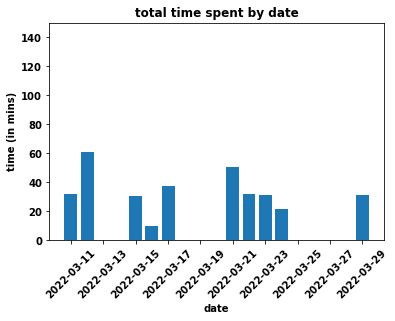

In [32]:
# plot number of games by gameplay
plt.bar(time_groupgameplay['just_date'],time_groupgameplay['diff']);
plt.xlabel('date')
plt.xticks(rotation=45)
# plt.yticks(range(0,20))
# plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.ylabel('time (in mins)');
plt.ylim(top=150)
plt.title('total time spent by date');

plt.savefig(main_results_path + '\\total_time_gameplay.png',bbox_inches = "tight")
plt.show();

##### total time spent on play

In [33]:
total_time = time_groupgameplay[['diff']].sum()
print(f'total time spent = {total_time[0]:.2f} mins')

total time spent = 337.03 mins


In [34]:
days = math.floor(total_time[0] / (24*60))
leftover_minutes = total_time[0] % (24*60)

hours = math.floor(leftover_minutes / 60)
mins = total_time[0] - (days*1440) - (hours*60)

print(f'total time spent = {days} days, {hours:.2f} hours, {mins:.2f} mins')

total time spent = 0 days, 5.00 hours, 37.03 mins


##### time spend by game

In [35]:
time_bygame = time_gameplay.groupby(['game_nr']).sum().reset_index()
time_bygame.index = time_bygame.index.map(game_id_dict)
time_bygame.drop(columns=['gameplay_nr'])

,game_nr,diff
Explore the World,0,134.200000
Fishing Game,1,101.383333
Drone Game,2,101.450000


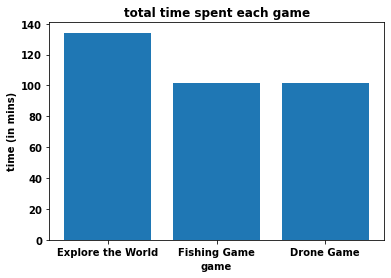

In [36]:
# plot number of games by gameplay
plt.bar(time_bygame.index,time_bygame['diff']);
plt.xlabel('game')
plt.ylabel('time (in mins)');
plt.title('total time spent each game');

plt.savefig(main_results_path + '\\total_time_game.png',bbox_inches = "tight")
plt.show();

##### time lapsed between gameplay

In [37]:
time_gameplay['lapsed_time'] = np.nan
for nr in range(0,len(time_gameplay)-1):
    time_gameplay = time_gameplay.sort_values('start')
    time_gameplay['lapsed_time'].iloc[nr+1] = time_gameplay.iloc[nr+1]['start'] - time_gameplay.iloc[nr]['end']
ave_lapsed_time = time_gameplay[['lapsed_time']].dropna().sum() / len(time_gameplay[['lapsed_time']])

lapsed_days = ave_lapsed_time.dt.days[0]
lapsed_hours, remainder = divmod(ave_lapsed_time.dt.seconds[0], 3600)
lapsed_minutes, lapsed_seconds = divmod(remainder, 60)
print(f'average lapsed time between gameplays = {lapsed_days} days, {lapsed_hours:.2f} hours, {lapsed_minutes:.2f} mins')

average lapsed time between gameplays = 0 days, 11.00 hours, 36.00 mins


##### gameplays by game

In [38]:
date_game0 = time_gameplay[time_gameplay['game_nr']==0].groupby(['just_date']).sum().reset_index()
date_game0.drop(columns=['gameplay_nr','game_nr'])

,just_date,diff
0,2022-03-11,21.533333
1,2022-03-12,20.583333
2,2022-03-15,10.216667
3,2022-03-16,10.033333
4,2022-03-17,17.533333
5,2022-03-21,13.566667
6,2022-03-22,10.366667
7,2022-03-23,10.150000
8,2022-03-24,9.750000
9,2022-03-29,10.466667


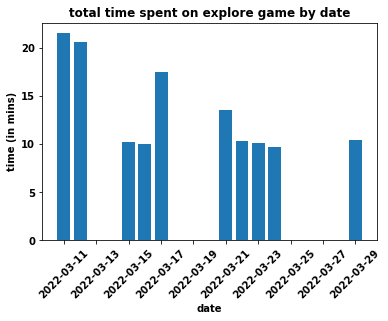

In [39]:
# plot explore game play by date
plt.bar(date_game0['just_date'],date_game0['diff']);
plt.xlabel('date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on explore game by date');

plt.savefig(main_results_path + '\\total_time_explore.png',bbox_inches = "tight")
plt.show();

In [40]:
date_game1 = time_gameplay[time_gameplay['game_nr']==1].groupby(['just_date']).sum().reset_index()
date_game1.drop(columns=['gameplay_nr','game_nr'])

,just_date,diff
0,2022-03-11,5.016667
1,2022-03-12,20.216667
2,2022-03-15,10.050000
3,2022-03-17,10.116667
4,2022-03-21,17.433333
5,2022-03-22,11.316667
6,2022-03-23,10.366667
7,2022-03-24,6.583333
8,2022-03-29,10.283333


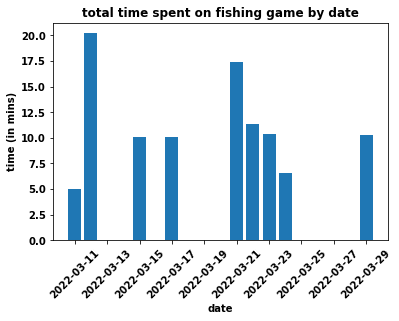

In [41]:
# plot explore game play by date
plt.bar(date_game1['just_date'],date_game1['diff']);
plt.xlabel('date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on fishing game by date');

plt.savefig(main_results_path + '\\total_time_fish.png',bbox_inches = "tight")
plt.show();

In [42]:
date_game2 = time_gameplay[time_gameplay['game_nr']==2].groupby(['just_date']).sum().reset_index()
date_game2.drop(columns=['gameplay_nr','game_nr'])

,just_date,diff
0,2022-03-11,5.183333
1,2022-03-12,20.266667
2,2022-03-15,10.250000
3,2022-03-17,10.066667
4,2022-03-21,19.600000
5,2022-03-22,10.183333
6,2022-03-23,10.566667
7,2022-03-24,5.133333
8,2022-03-29,10.200000


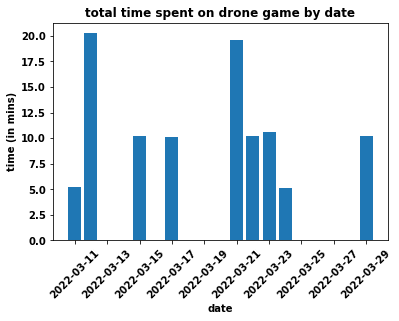

In [43]:
# plot explore game play by date
plt.bar(date_game2['just_date'],date_game2['diff']);
plt.xlabel('date')
plt.xticks(rotation=45)
plt.ylabel('time (in mins)');
plt.title('total time spent on drone game by date');

plt.savefig(main_results_path + '\\total_time_drone.png',bbox_inches = "tight")
plt.show();

**plot all games by date**

In [44]:
dfs = reduce(lambda x,y: pd.merge(x,y, on='just_date', how='outer'), [date_game0, date_game1, date_game2]).fillna(0)
dfs.drop(columns=['gameplay_nr_x','gameplay_nr_y','gameplay_nr','game_nr_x','game_nr_y','game_nr'],inplace=True)

In [45]:
dfs.rename(columns={'diff_x': 'explore',
                    'diff_y': 'fish',
                   'diff': 'drone'}, inplace=True)
dfs = dfs.set_index(['just_date']).sort_values(['just_date'])
# dfs

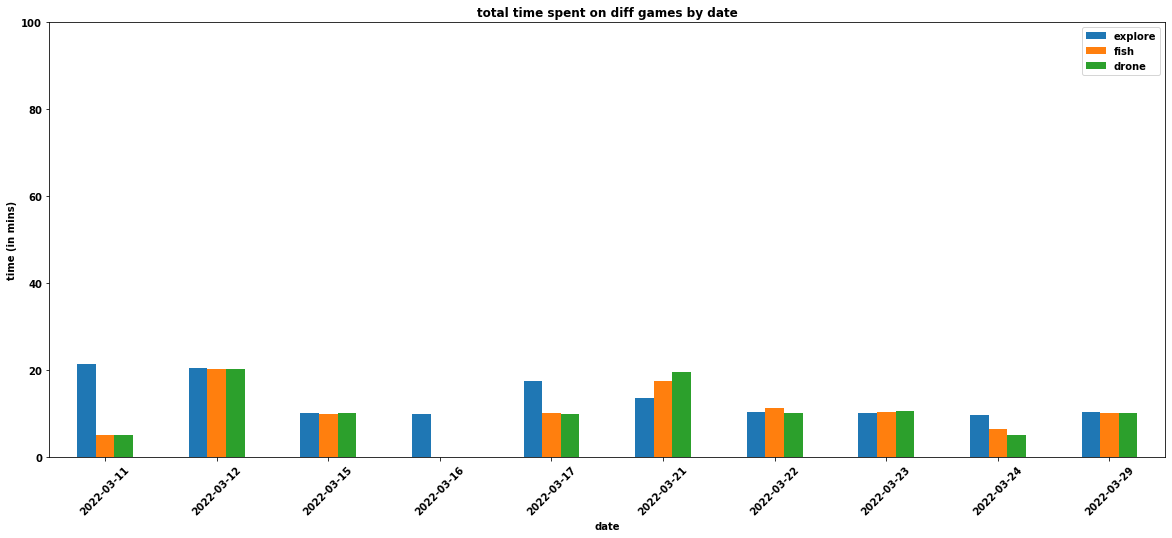

In [46]:
# plot time spent on games by date
dfs.plot.bar(figsize=(20,8))
plt.xlabel('date')
plt.xticks(rotation=45)
plt.ylim(top=100)
plt.ylabel('time (in mins)');
plt.title('total time spent on diff games by date');

plt.savefig(main_results_path + '\\total_time_game_separate.png',bbox_inches = "tight")
plt.show();

##### number of times each game was played

In [47]:
gamecount = time_gameplay.groupby(['game_nr']).count().reset_index()
gamecount.index = gamecount.index.map(game_id_dict)
gamecount.drop(columns=['gameplay_nr','end','diff','just_date','lapsed_time'])

,game_nr,start
Explore the World,0,15
Fishing Game,1,11
Drone Game,2,11


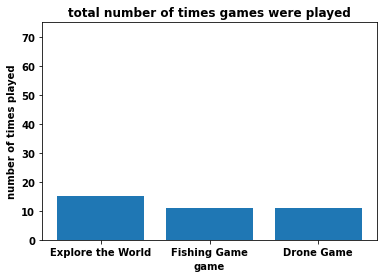

In [48]:
# plot number of games played
plt.bar(gamecount.index,gamecount['gameplay_nr']);
plt.xlabel('game')
plt.ylabel('number of times played');
plt.ylim(top=75)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10))
plt.title('total number of times games were played');

plt.savefig(main_results_path + '\\times_played_game.png',bbox_inches = "tight")
plt.show();

**save outputs to txt file**

In [49]:
with open(main_results_path + '\\outputs.txt', mode='w') as file_:
    file_.write(f'total number of days played = {active_days} days')
    file_.write("\n")  # Next line.
    file_.write(f'total time spent = {total_time[0]:.2f} mins')
    file_.write("\n")  
    file_.write(f'total time spent = {days} days, {hours:.2f} hours, {mins:.2f} mins')
    file_.write("\n")  
    file_.write(f'average lapsed time between gameplays = {lapsed_days} days, {lapsed_hours:.2f} hours, {lapsed_minutes:.2f} mins')
    file_.write("\n")  

#### Total force, velocity

In [50]:
gameplay_nr = []
game_nr = []
Ftot_mean = []
Ftot_std = []
vel_mean = []
vel_std = []
vel_diff = []

for gameplay, df in enumerate(df_gameplay):
    for game in range(0,3):
        if game in df['GameID'].unique():
            df_game = df[df['GameID']==game]
            gameplay_nr.append(gameplay)
            game_nr.append(game)
            Ftot_mean.append(df_game['TotalForce'].mean())
            Ftot_std.append(df_game['TotalForce'].std())
            
            # vel from coord 
            # note coord in m
            df_game[['TimeStampMS_diff','x_diff','y_diff']]=df_game[['TimeStampMS','XCoordinate','YCoordinate']].diff()
            df_game['step_size'] = np.sqrt(df_game['x_diff']**2+df_game['y_diff']**2)
            # vel in m/sec
            df_game['velocity'] = df_game['step_size']/(df_game['TimeStampMS_diff']/1000)
            vel_mean.append(df_game['velocity'].mean())
            vel_std.append(df_game['velocity'].std())

#             # vel from velX and velY from db
#             df_game['vel_db'] = np.sqrt(df_game['VelocityX']**2+df_game['VelocityY']**2)
#             veldb_mean.append(df_game['vel_db'].mean())
#             veldb_std.append(df_game['vel_db'].std())
                        
            # vel difference within gameplay
            vel_last = np.nanmean(np.hstack(np.array_split(df_game['velocity'],20)[16:18]))
            vel_begin = np.nanmean(np.hstack(np.array_split(df_game['velocity'],20)[1:3]))
            vel_diff.append(vel_last - vel_begin)


In [51]:
# put in df
gen_parameters = pd.DataFrame(gameplay_nr, columns=['gameplay_nr'])
gen_parameters['game_nr'] = game_nr
gen_parameters['Ftot_mean'] = Ftot_mean
gen_parameters['Ftot_std'] = Ftot_std
gen_parameters['vel_mean'] = vel_mean
gen_parameters['vel_std'] = vel_std
gen_parameters['vel_diff'] = vel_diff


In [52]:
# gen_parameters

In [53]:
# save df to csv
gen_parameters.to_csv('./data/P' + patientid + '_gen_parameters.csv')

In [54]:
# split according to games
gen_explore = gen_parameters[gen_parameters['game_nr']==0]
gen_fish = gen_parameters[gen_parameters['game_nr']==1]
gen_drone = gen_parameters[gen_parameters['game_nr']==2]

##### Plot mean total force
only for explore game

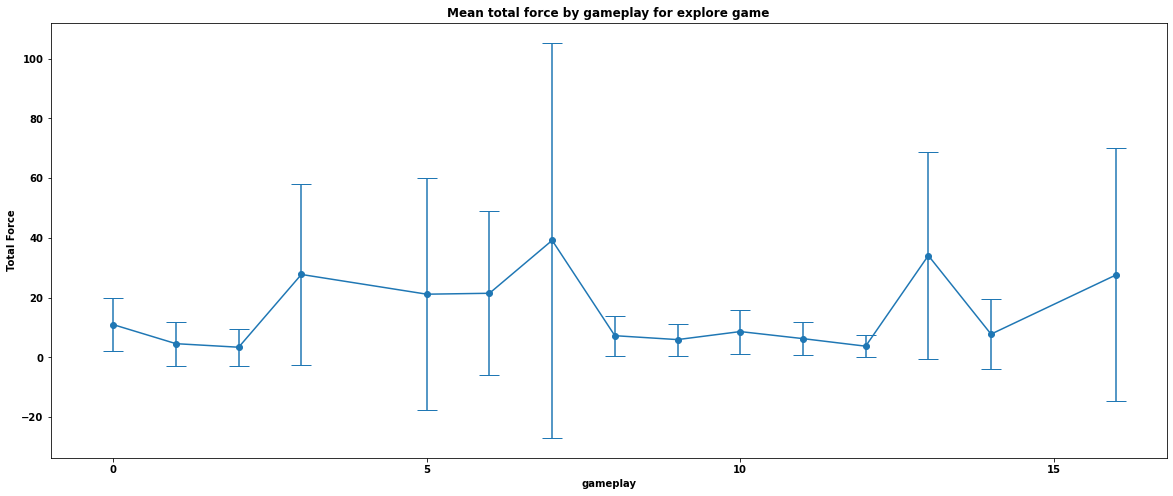

In [55]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['gameplay_nr'],gen_explore['Ftot_mean'],gen_explore['Ftot_std'], marker='o', capsize=10)
plt.xlim(left=-1);
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('Total Force')
plt.title('Mean total force by gameplay for explore game')

plt.savefig(main_results_path + '\\Ftotal_explore.png',bbox_inches = "tight")
plt.show();

##### Plot mean velocity (by gameplay)

In [56]:
ex = gen_explore['vel_mean'].mean()
fish = gen_fish['vel_mean'].mean()
dr = gen_drone['vel_mean'].mean()
mean_vel_max=max([ex,fish,dr])

vel_max = gen_parameters['vel_mean'].max()

if ex==mean_vel_max:
    max_vel_game='explore'
elif fish==mean_vel_max:
    max_vel_game='fish'
elif dr==mean_vel_max:
    max_vel_game='drone'
    
print(f'Max mean velocity of {vel_max:.3f} m/s occurred during {max_vel_game} game')

Max mean velocity of 0.120 m/s occurred during fish game


In [57]:
# save to outputs file
with open(main_results_path + '\\outputs.txt', mode='a') as file_:
    file_.write(f'Max mean velocity of {vel_max:.3f} m/s occurred during {max_vel_game} game')
    file_.write("\n")  # Next line.

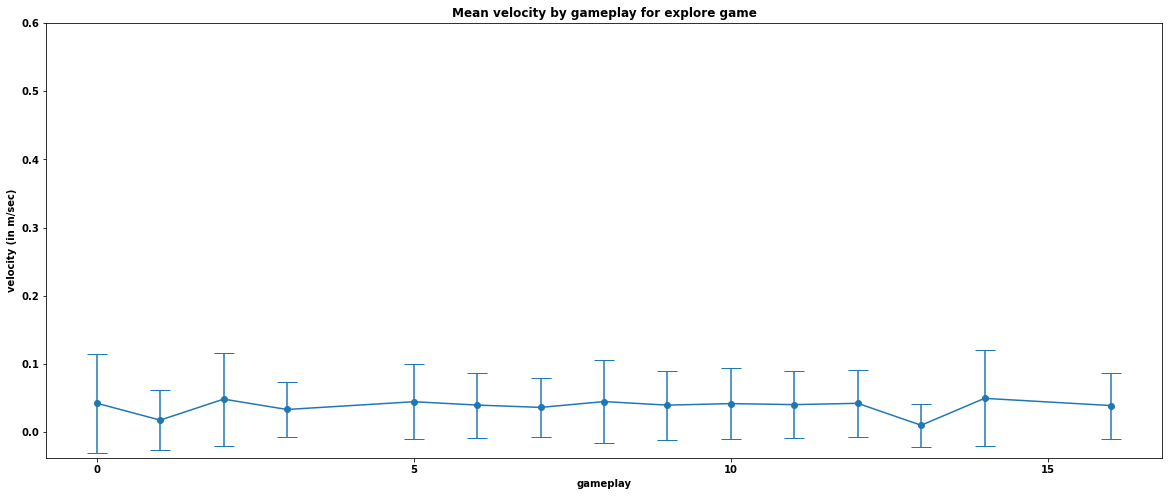

In [58]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_explore['gameplay_nr'],gen_explore['vel_mean'],gen_explore['vel_std'], marker='o', capsize=10);
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('velocity (in m/sec)')
plt.ylim(top=0.6)
plt.title('Mean velocity by gameplay for explore game');

plt.savefig(main_results_path + '\\Mean_vel_explore.png',bbox_inches = "tight")
plt.show();

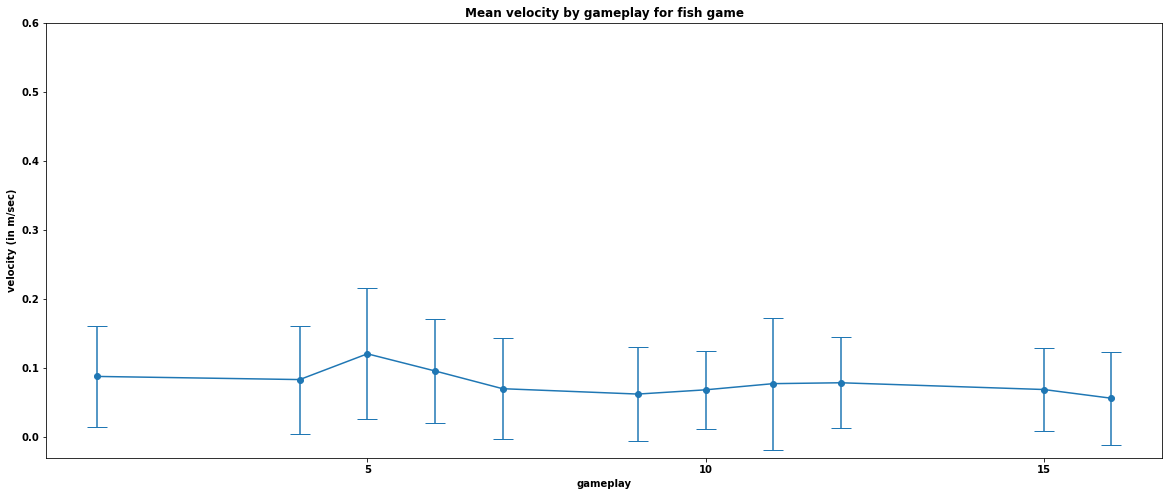

In [59]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_fish['gameplay_nr'],gen_fish['vel_mean'],gen_fish['vel_std'], marker='o', capsize=10);

plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('velocity (in m/sec)')
plt.ylim(top=0.6)
plt.title('Mean velocity by gameplay for fish game')

plt.savefig(main_results_path + '\\Mean_vel_fish.png',bbox_inches = "tight")
plt.show();

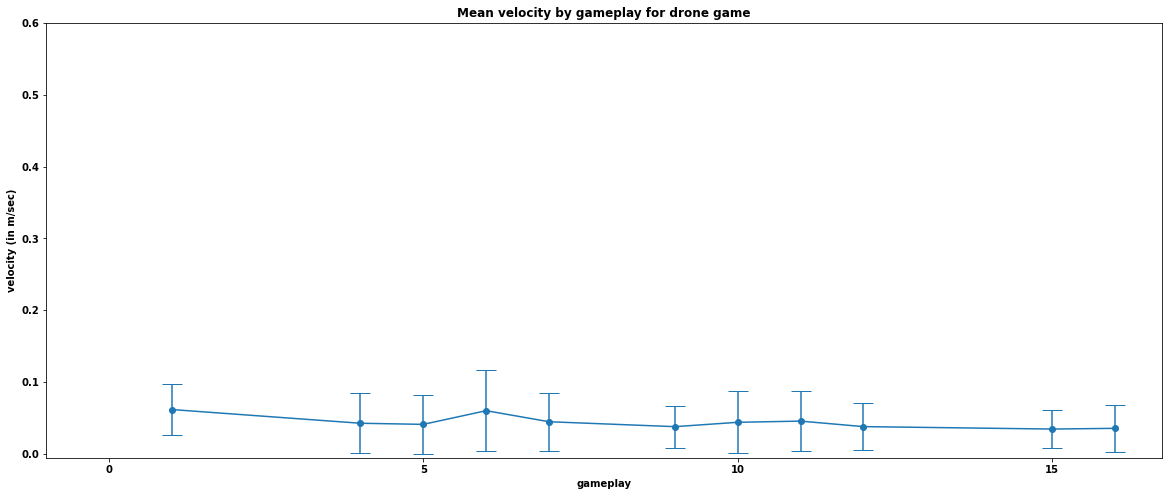

In [60]:
plt.figure(figsize=(20,8))
plt.errorbar(gen_drone['gameplay_nr'],gen_drone['vel_mean'],gen_drone['vel_std'], marker='o', capsize=10);

plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlim(left=-1)
plt.ylabel('velocity (in m/sec)')
plt.ylim(top=0.6)
plt.title('Mean velocity by gameplay for drone game')

plt.savefig(main_results_path + '\\Mean_vel_drone.png',bbox_inches = "tight")
plt.show();

##### Plot change in velocity (within gameplay) by gameplay

No handles with labels found to put in legend.


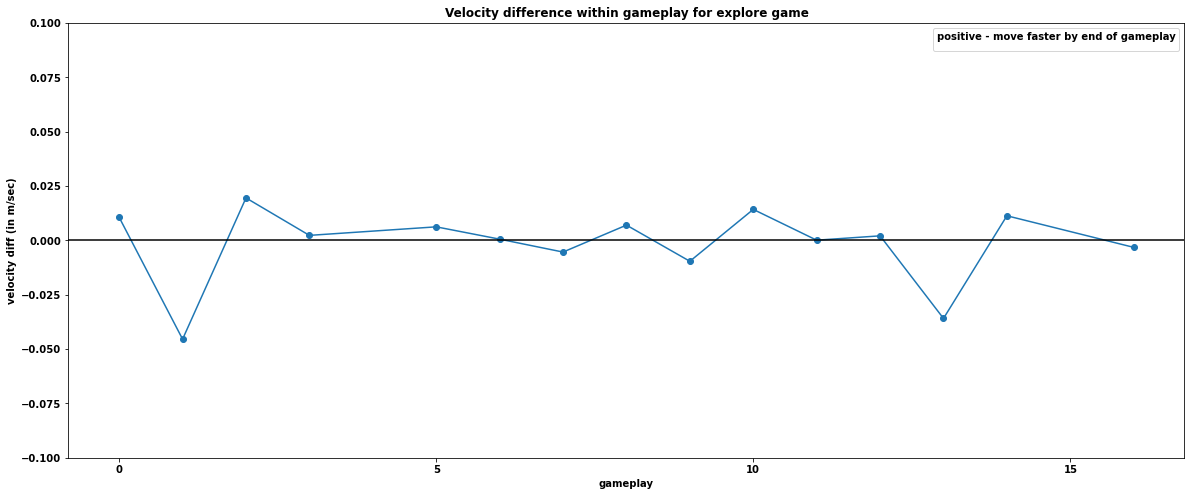

In [61]:
plt.figure(figsize=(20,8))
plt.plot(gen_explore['gameplay_nr'],gen_explore['vel_diff'], marker='o');
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.axhline(y=0, color='black',linestyle='-')
plt.ylabel('velocity diff (in m/sec)')
plt.ylim([-0.1,0.1])
plt.title('Velocity difference within gameplay for explore game');
plt.legend(title='positive - move faster by end of gameplay')

plt.savefig(main_results_path + '\\Vel_diff_explore.png',bbox_inches = "tight")
plt.show();

No handles with labels found to put in legend.


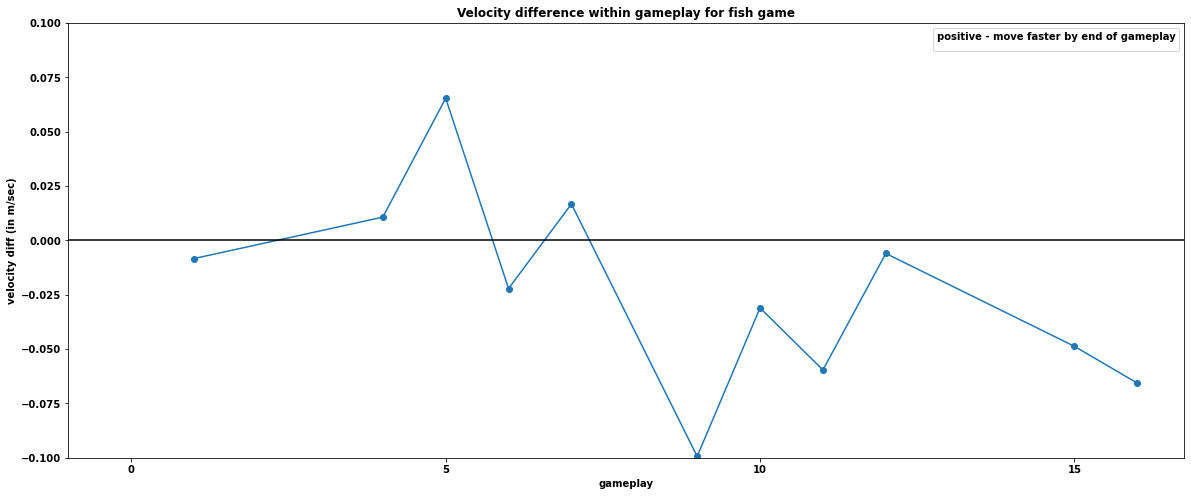

In [62]:
plt.figure(figsize=(20,8))
plt.plot(gen_fish['gameplay_nr'],gen_fish['vel_diff'],marker='o');

plt.xlabel('gameplay')
plt.xlim(left=-1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.axhline(y=0, color='black',linestyle='-')
plt.ylabel('velocity diff (in m/sec)')
plt.ylim([-0.1,0.1])
plt.title('Velocity difference within gameplay for fish game');
plt.legend(title='positive - move faster by end of gameplay')
plt.savefig(main_results_path + '\\Vel_diff_fish.png',bbox_inches = "tight")
plt.show();

No handles with labels found to put in legend.


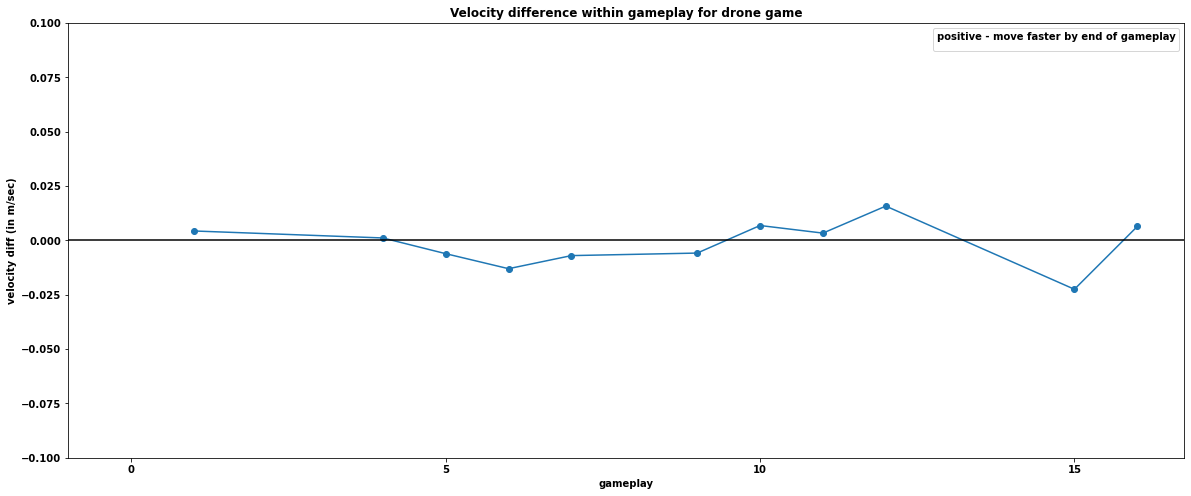

In [63]:
plt.figure(figsize=(20,8))
plt.plot(gen_drone['gameplay_nr'],gen_drone['vel_diff'],marker='o');

plt.xlabel('gameplay')
plt.xlim(left=-1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.axhline(y=0, color='black',linestyle='-')
plt.ylabel('velocity diff (in m/sec)')
plt.ylim([-0.1,0.1])
plt.title('Velocity difference within gameplay for drone game');
plt.legend(title='positive - move faster by end of gameplay')
plt.savefig(main_results_path + '\\Vel_diff_drone.png',bbox_inches = "tight")
plt.show();


#### Fish game analysis

In [64]:
def plot_fish_analysis(game):
    '''function to plot velocity and direct distance (between basket and fish caught), defined by targets'''
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax1.plot(repeats.index,repeats['velocity'],marker='o',color='red',label='velocity');
    ax1.set_xlim(left=0);
    ax1.set_ylim(bottom=0);
    ax1.set_ylabel('velocity/ in m/s')

    ax1.legend(loc='upper right')
    ax1.set_title('velocity');

    ax2.plot(repeats.index,repeats['reach'],marker='o',color='blue',label='distance');
    ax2.set_xlim(left=0);
    ax2.set_ylim(bottom=0);
    ax2.set_ylabel('distance/ m')
    ax2.legend(loc='upper right')
    ax2.set_title('direct distance');

    plt.suptitle('Player = {}, Plot velocity and direct distance in each target: gameplay nr={}, Game=fish'.format(patientid, gameplay),fontsize=15)
    plt.xlabel('targets',fontsize=12);

In [65]:
gameplay_nr = []
fish_vel = []
fish_dist = []
pct_time_basket = []
curvature_idx = []

for gameplay, df in enumerate(df_gameplay):
    # analysis only for fish game
    game=1
    if game in df['GameID'].unique():
        df_game = df[df['GameID']==1]
        df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
        df_game['TimeStampMS_diff'] = df_game['TimeStampMS'].diff()
        
        fish_vel_mean = []
        fish_reach = []
        ## define repeats  
        repeats = df_game[df_game['TimeStampMS_diff']>50][['tsec','XCoordinate','YCoordinate']].reset_index().drop(columns=['index'])
        repeats.loc[-1] = df_game.iloc[0][['tsec','XCoordinate','YCoordinate']].fillna(0)  # adding the first row
        repeats.index = repeats.index + 1  # shifting index
        repeats.sort_index(inplace=True)
        
        ## calculate velocity of each repeat per gameplay
        repeats['velocity'] = np.nan
        repeats['dist'] = np.nan
        for nr in range(0,len(repeats['tsec'])):
            if nr != (len(repeats['tsec'])-1):
                df_fish = df_game[(df_game['tsec']>=repeats.iloc[nr]['tsec']) & (df_game['tsec']<=repeats.iloc[nr+1]['tsec'])]
            else:
                if (repeats.iloc[nr]['tsec'] != df_game['tsec'].iloc[-1]):
                    df_fish = df_game[(df_game['tsec']>=repeats.iloc[nr]['tsec']) & (df_game['tsec']<=df_game['tsec'].iloc[-1])]
                
            df_fish[['tsec_diff','x_diff','y_diff']]=df_fish[['tsec','XCoordinate','YCoordinate']].diff()
            df_fish['step_size'] = np.sqrt(df_fish['x_diff']**2+df_fish['y_diff']**2)
            repeats['dist'].iloc[nr] = df_fish['step_size'].sum() 
            
            # vel in m/sec
            fish_vel_mean.append((df_fish['step_size'].sum())/(df_fish['tsec_diff'].sum()))
            fish_reach.append(np.sqrt((df_fish['XCoordinate'].iloc[-1] - df_fish['XCoordinate'].iloc[0]) ** 2 + (df_fish['YCoordinate'].iloc[-1] - df_fish['YCoordinate'].iloc[0]) ** 2))
                
        repeats['velocity'] = fish_vel_mean
        repeats['reach'] = fish_reach # similar to direct_dist
        repeats['curvature_idx'] = repeats['dist']/ repeats['reach']
        
        # mean curvature index 
        gameplay_nr.append(gameplay)
        curvature_idx.append(repeats['curvature_idx'].mean())
        
        ## velocity and direct distance between fish and basket
        x_0 = np.hstack(np.array_split(repeats['velocity'],20)[1:3]).mean()
        x_last = np.hstack(np.array_split(repeats['velocity'],20)[16:18]).mean()
        fish_vel_diff = x_last - x_0

        dist_0 = np.hstack(np.array_split(repeats['reach'],20)[1:3]).mean()
        dist_last = np.hstack(np.array_split(repeats['reach'],20)[16:18]).mean()
        fish_dist_diff = dist_last - dist_0
        fish_vel.append(fish_vel_diff)
        fish_dist.append(fish_dist_diff)
        
        ## time lingering in basket
        df_game[['tsec_diff','y_diff']] = df_game[['tsec','YCoordinate']].diff()
        basket_linger = (df_game[(df_game['YCoordinate']<0.03) & (df_game['y_diff']==0)][['tsec_diff']].sum()/ df_game['tsec'].iloc[-1])*100
        pct_time_basket.append(basket_linger)
        
        # put in explore_curvature df
        fish_curvature = pd.DataFrame(gameplay_nr, columns=['gameplay_nr'])
        fish_curvature['curvature_idx'] = curvature_idx
        
#         plot_fish_analysis(df_game)

#         # save fig
#         # note this will overwrite previously saved fig 
#         results_path = os.path.join('data', 'results', patientid, 'fish')
#         if not os.path.exists(results_path):
#             os.makedirs(results_path)
#         plt.savefig(results_path + '\\fig{}-fish.png'.format(gameplay))
#         plt.show()

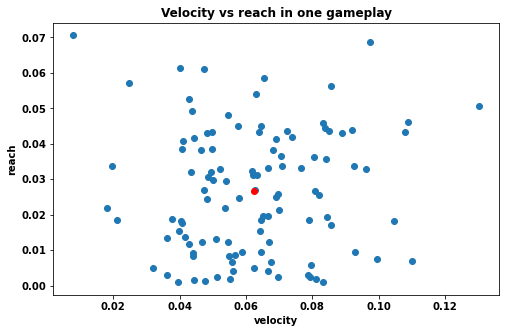

In [66]:
# velocity vs reach in last gameplay
plt.figure(figsize=(8,5))
plt.scatter(repeats['velocity'][:-1],repeats['reach'][:-1],marker='o')
plt.scatter(repeats['velocity'][:-1].mean(),repeats['reach'][:-1].mean(),marker='o',color='red')
plt.xlabel('velocity')
plt.ylabel('reach')
plt.title('Velocity vs reach in one gameplay',fontsize=12);

##### Plot mean curvature index over gameplays

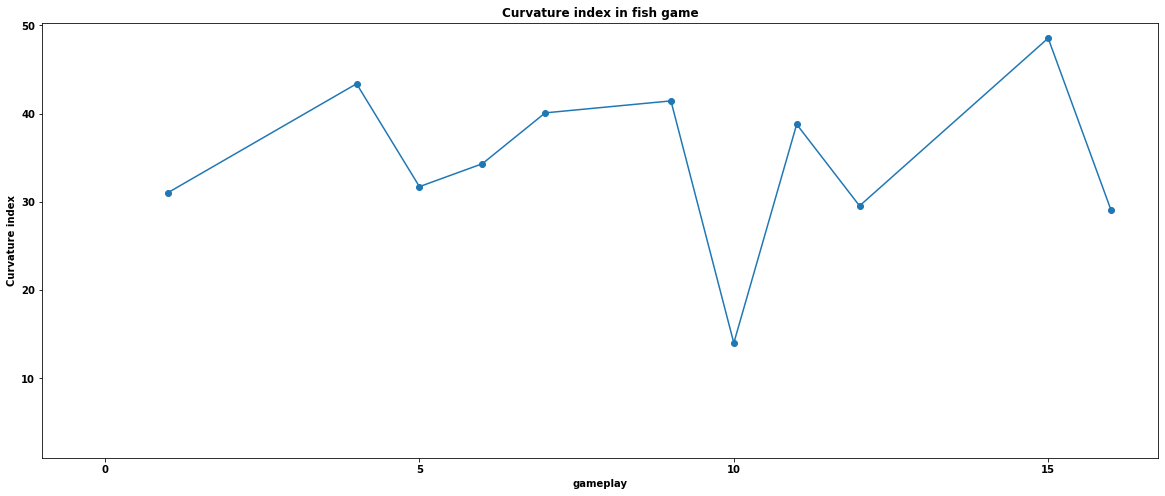

In [67]:
plt.figure(figsize=(20,8))
plt.plot(fish_curvature['gameplay_nr'], fish_curvature['curvature_idx'], marker='o')
plt.xlim(left=-1);
# plt.ylim(top=3)
plt.ylim(bottom=1)
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10))
plt.ylabel('Curvature index')
plt.title('Curvature index in fish game')

plt.savefig(main_results_path + '\\curvature_idx_fish.png',bbox_inches = "tight")
plt.show();

##### Plot difference in targets velocity over gameplays

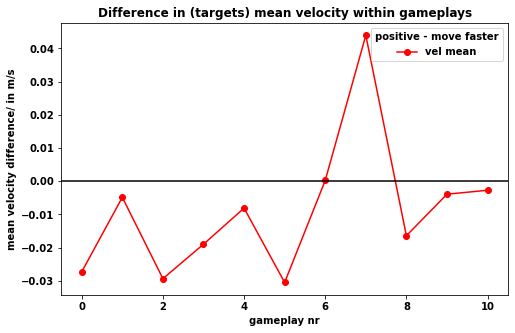

In [68]:
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(fish_vel),color='red',marker='o',label='vel mean')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('gameplay nr')
plt.ylabel('mean velocity difference/ in m/s')
plt.title('Difference in (targets) mean velocity within gameplays',fontsize=12)
plt.legend(title='positive - move faster')

plt.savefig(main_results_path + '\\fish_targets_vel_mean.png',bbox_inches = "tight")
plt.show();

##### Plot difference in direct distance (between fish and basket) over gameplays

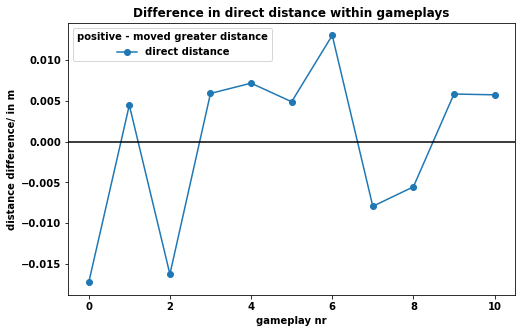

In [69]:
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(fish_dist), marker='o',label='direct distance')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('gameplay nr')
plt.ylabel('distance difference/ in m')
plt.title('Difference in direct distance within gameplays',fontsize=12)
plt.legend(title='positive - moved greater distance')

plt.savefig(main_results_path + '\\fish_direct_distance.png',bbox_inches = "tight")
plt.show();

##### Plot pct time spent lingering in basket

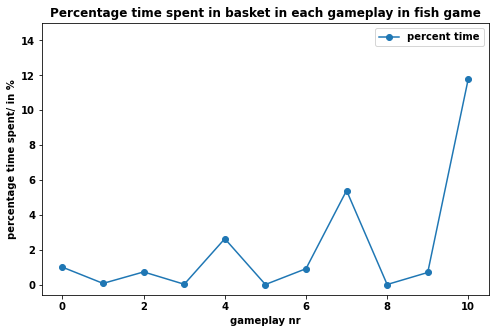

In [70]:
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(pct_time_basket), marker='o',label='percent time')
plt.xlabel('gameplay nr')
plt.ylabel('percentage time spent/ in %')
plt.ylim(top=15)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.title('Percentage time spent in basket in each gameplay in fish game',fontsize=12)
plt.legend()

plt.savefig(main_results_path + '\\fish_time_basket.png',bbox_inches = "tight")
plt.show();

##### Plot diff in reach vs diff in vel

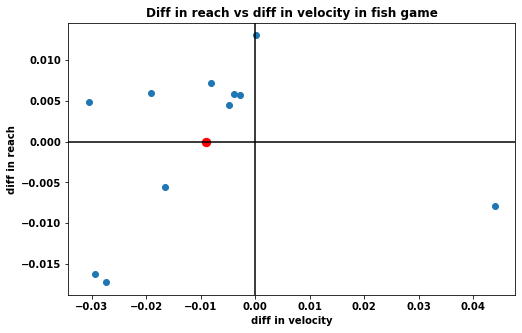

In [71]:
plt.figure(figsize=(8,5)) 
plt.scatter(fish_vel,fish_dist, marker='o');
plt.scatter(sum(fish_vel)/len(fish_vel),sum(fish_dist)/len(fish_dist), s=70, marker='o',color='red');
plt.axhline(y=0, color='black',linestyle='-')
plt.axvline(x=0, color='black',linestyle='-')
plt.xlabel('diff in velocity')
plt.ylabel('diff in reach')
plt.title('Diff in reach vs diff in velocity in fish game',fontsize=12);

In [72]:
pd.DataFrame(fish_vel,fish_dist).to_csv('./data/P' + patientid + '_fish_reach_vel.csv')

#### Plot coordinates

**declare path for saving fig**
<br> new path/folder declared in this section  again

In [73]:
# declared for plotting and savefig
# double checking
patientid = df['PatientID'].unique()[0]
if type(patientid) != str:
    patientid = '00' + df['PatientID'].unique()[0].astype(str)
patientid

'001'

**determine between assistive 'A' vs perturbation 'P' modes**
<br> only applicable in auto mode, not in manual mode
<br> assistance: visual == target
<br> perturbation: visual != target (handle trying to reach visual)

In [74]:
def define_haptics(row):
    if row['TargetXCoord']==row['VisualTargetXCoord']:
        row['haptics']='A'
    else:
        row['haptics']='P'
    return row

In [75]:
def change_Kx(row):
    if row['mode'] == 'P':
        row['KxGain'] *= -1
    return row

In [76]:
def plot_coord(tset):
    '''function to plot coordinates, defined by change in A-P modes'''
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    ## x-coord
    ax1.scatter(tset['tsec'],tset['XCoordinate'],s=5,color='red',ls='None',label='X coord');
    if game==2: # only plot for drone
        ax1.scatter(tset['tsec'],tset['VisualTargetXCoord'],s=20,color='orange',ls='None',label='X Target');
        
    if game==0: # only plot for explore
        ax1.scatter(tset['tsec'],tset['TargetXCoord'],s=20,color='green',ls='None',label='X Target');

        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}
        xcoords = np.nan_to_num(tset[tset['VisualTargetXCoord_diff']!=0]['tsec'])
        for xc in xcoords:
            ax1.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'

    ax1.set_xlim(left=0);
    ax1.set_ylabel('x-coord')
    ax1.legend(loc='upper right')
    ax1.set_title('X coordinates');

    ## y-coord
    ax2.scatter(tset['tsec'],tset['YCoordinate'],s=5,color='blue',label='Y coord');
    if game==2: # only plot for drone
        ax2.scatter(tset['tsec'],tset['VisualTargetYCoord'],s=20,color='orange',ls='None',label='X Target');
    if game==0: # only plot for explore 
        ax2.scatter(tset['tsec'],tset['TargetYCoord'],s=20,color='green',label='Y Target');

        my_labels = {'xcoords': 'repeat'}
        for xc in xcoords:
            ax2.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
           
    ax2.set_xlim(left=0);
    ax2.set_ylabel('y-coord')
    ax2.legend(loc='upper right')
    ax2.set_title('Y coordinates');

    plt.suptitle('Player = {}, Plot coordinates: gameplay nr={}, Game={} '.format(patientid, gameplay, gamename),fontsize=15)
    plt.xlabel('time/ in sec',fontsize=12);

In [78]:
for gameplay, df in enumerate(df_gameplay):
    for game in range(0,3):
        if game in df['GameID'].unique():
            df_game = df[df['GameID']==game]
            df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
            
            # mode change only for explore game
            if game==0:
                # define vertical lines for change in haptics
                df_game['VisualTargetXCoord_diff'] = df_game['VisualTargetXCoord'].diff()
                
                # assumption is that VisualTarget is delayed by ONE phase, and sessionID has been corrected
                # drop first value of VisualTarget (from previous gameplay?)
                visual1 = df_game[df_game['VisualTargetXCoord_diff']!=0][['VisualTargetXCoord']].iloc[1:,:].reset_index().drop(columns=['index'])
                df_game['TargetXCoord_diff'] = df_game['TargetXCoord'].diff()
                # drop last value of Target
                target1 = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']][:-1].reset_index().drop(columns=['index'])
                # merge and compare both values to determine mode
                target_visual = pd.merge(target1,visual1,left_index=True, right_index=True).fillna(0)
                target_visual = target_visual.apply(define_haptics,axis=1)
            
            # label plots
            if game==0:
                gamename='explore'
            elif game==1:
                gamename='fish'
            elif game==2:
                gamename='drone'
                                      
#             plot_coord(df_game)
            
#             # save fig
#             # note this will overwrite previously saved fig 
#             results_path = os.path.join('data', 'results', patientid, 'coord')
#             if not os.path.exists(results_path):
#                 os.makedirs(results_path)
#             plt.savefig(results_path + '\\fig{}-{}.png'.format(gameplay,gamename))
#             plt.show()

#### Explore game analysis: Stiffness (Kxx), Force and Coord

In [81]:
def plot_k_force(tset):
    '''function to plot stiffness Kx and forces calculated, only for explore game'''
    # only plot for explore game
    fig = plt.figure(figsize=(20,15))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    ## plot K
    ax1.scatter(tset['tsec'],tset['KxGain'],s=5,color='blue',label='K_xx');
    # only calculate/plot for explore game
    if game==0: 
        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}
        xcoords = np.nan_to_num(tset[tset['VisualTargetXCoord_diff']!=0]['tsec'])
        for xc in xcoords:
            ax1.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
               
    ax1.set_xlim(left=0);
    ax1.set_ylabel('K_xx')
    ax1.legend(loc='upper right')
    ax1.set_title('K_xx');

    ## plot forces
    ax2.axhline(y=21, color='green', linestyle='--',label='F_max')
    ax2.scatter(tset['tsec'],tset['TotalForce'],s=6,color='red',label='F_total');
#     ax2.scatter(tset['tsec'],tset['F_spring'],s=3,color='cyan',label='F_spring');
    ax2.scatter(tset['tsec'],tset['F_sens'],s=3,color='black',label='F_sens');
    
    if game==0: 
        # plot vertical lines for repeats
        my_labels = {'xcoords': 'repeat'}
        for xc in xcoords:
            ax2.axvline(x=xc,ls='--',label=my_labels['xcoords'])
            my_labels['xcoords']='_nolegend_'
       
    ax2.set_xlim(left=0);
    ax2.set_ylabel('Force/N')
    ax2.legend(loc='upper right')
    ax2.set_title('Total Force');
    
    plt.suptitle('Player = {}, Plot K_xx and Forces: gameplay nr={}, Game=explore'.format(patientid, gameplay),fontsize=15)
    plt.xlabel('time/ in sec',fontsize=12);

In [82]:
# plot stiffness, taken into account A/P mode
# calculate forces, including F_sens (determined by current passing thru motors)
rp = 0.016    # radius of pulley
J_p_th = np.array([[rp/2,rp/2],[rp/2,-rp/2]])   # jacobian matrix
J_p_th = np.transpose(J_p_th)

gameplay_nr = []
game_nr = []
F_deficit_mean = []
F_deficit_std = []
F_sens_mean = []
F_sens_std = []
Fsens_21 =[]
Ftot_21 = []
Fspring_21 = []
kx_mean = []
kx_std = []
Kx_r_q3 = []
Kx_range = []
Kx_Atime = []
Kx_Ptime = []
help_mode = []
haptics_rho = []
haptics_pvalue = []
repeatn = []
curvature_idx = []
curvature_idx_change = []

for gameplay, df in enumerate(df_gameplay):
    # only calculate for explore game
    game=0
    if game in df['GameID'].unique():
        df_game = df[df['GameID']==0]
        df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
        df_game['TimeStampMS_diff'] = df_game['TimeStampMS'].diff()

        ## define A-P mode 
        # define vertical lines for change in haptics
        df_game['VisualTargetXCoord_diff'] = df_game['VisualTargetXCoord'].diff()
     
        # assumption is that VisualTarget is delayed by ONE phase, and sessionID has been corrected
        # drop first value of VisualTarget (from previous gameplay?)
        visual1 = df_game[df_game['VisualTargetXCoord_diff']!=0][['VisualTargetXCoord','VisualTargetYCoord']].iloc[1:,:].reset_index().drop(columns=['index'])
        df_game['TargetXCoord_diff'] = df_game['TargetXCoord'].diff()
        # drop last value of Target
        target1 = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord','TargetYCoord']][:-1].reset_index().drop(columns=['index'])
        # merge and compare both values to determine mode
        target_visual = pd.merge(target1,visual1,left_index=True, right_index=True).fillna(0)
        target_visual = target_visual.apply(define_haptics,axis=1)

        # assumption is that mode change starts exactly on defined tsec 
        # no info on last haptic, since VisualTarget unknown within same gameplay
        df_game['mode'] = np.nan
        for start, time in enumerate(target_visual['tsec']):
            if start != (target_visual['tsec'].size-1):
                df_game['mode'].loc[(df_game['tsec']>=target_visual['tsec'][start]) & (df_game['tsec']<target_visual['tsec'][start+1])] = target_visual['haptics'].iloc[start]

        ## Kx   
        # moving median is more robust, since it recovers the underlying trend of the discrete Kx
        # taken into account only +ve values
        Kx_r_pos = df_game['KxGain'].rolling(1000).median()
        
        # negate Kx if in P mode
        df_game = df_game.apply(change_Kx,axis=1)
        
        # moving median taken into account -ve values
        Kx_r_neg = df_game['KxGain'].rolling(1000).median()
        
        ## detect help_mode, change in gradient
        target_visual['gradient'] = np.nan
        for start, time in enumerate(target_visual['tsec']):
            if start != (target_visual['tsec'].size-1):
                target_visual['gradient'].iloc[start] = df_game[(df_game['tsec']>target_visual['tsec'][start]) & (df_game['tsec']<target_visual['tsec'][start+1])][['KxGain']].agg(np.ptp).values[0]
            else:
                last_repeattime = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']].iloc[-1].values[0]
                target_visual['gradient'].iloc[start] = df_game[(df_game['tsec']>target_visual['tsec'][start]) & (df_game['tsec']<last_repeattime)][['KxGain']].agg(np.ptp).values[0]
        
        # nr of help_mode
        help_mode.append(target_visual[(target_visual['gradient']!=0) & (abs(target_visual['gradient'])>=500)]['gradient'].count())
        
        ## ------
        ## define forces
        ## calculate F_spring
        # distance to target
        df_game['dist_targ'] = np.sqrt((df_game['TargetXCoord'] - df_game['XCoordinate'])**2 + (df_game['TargetYCoord'] - df_game['YCoordinate'])**2)
        df_game['F_spring'] = df_game['KxGain']*df_game['dist_targ']
        
        # calculate F_sens
        df_game['tau_a_left'] = 0.0398*df_game['CurrentSenseLeft']
        df_game['tau_a_right'] = 0.0398*df_game['CurrentSenseRight']
        
        F_sens = []
        for i in range(0,len(df_game['tau_a_left'])):
            # matlab's equivalent in the least squares sense to the under- or overdetermined system of equations AX = B
            mat = np.linalg.lstsq(J_p_th , np.array([df_game['tau_a_left'].iloc[i], df_game['tau_a_right'].iloc[i] 
                                                    ]).reshape(2,1))[0]
            mat_norm = np.linalg.norm(mat,1)
            F_sens.append(mat_norm)
        df_game['F_sens'] = F_sens
        df_game['F_deficit'] = df_game['F_sens']/df_game['TotalForce']
        
        # determine correlation between F_sens and KxGain
        rho, p = scipy.stats.spearmanr(df_game['F_sens'].rolling(1000).median().dropna(),df_game['KxGain'].rolling(1000).median().dropna())
        
        ## calculate curvature index
        # calculate direct distance 
        target_visual['direct_dist'] = np.nan
        target_visual['dist'] = np.nan
        for nr in range(0,len(target_visual['tsec'])):
            if nr != (len(target_visual['tsec'])-1):
                df_drone = df_game[(df_game['tsec']>=target_visual.iloc[nr]['tsec']) & (df_game['tsec']<=target_visual.iloc[nr+1]['tsec'])]

                df_drone[['tsec_diff','x_diff','y_diff']]=df_drone[['tsec','XCoordinate','YCoordinate']].diff()
                df_drone['step_size'] = np.sqrt(df_drone['x_diff']**2+df_drone['y_diff']**2)
                # calculate distance moved 
                target_visual['dist'].iloc[nr] = df_drone['step_size'].sum() 
                # calculate direct distance between targets
                target_visual['direct_dist'].iloc[nr] = math.hypot(target_visual['VisualTargetXCoord'].iloc[nr+1] - target_visual['VisualTargetXCoord'].iloc[nr], target_visual['VisualTargetYCoord'].iloc[nr+1] - target_visual['VisualTargetYCoord'].iloc[nr])

            target_visual['curvature_idx'] = target_visual['dist']/ target_visual['direct_dist']
        
        # curvature index
        ci_0_mean = np.mean(np.hstack(np.array_split(target_visual['curvature_idx'],20)[1:3]))
        ci_last_mean = np.mean(np.hstack(np.array_split(target_visual['curvature_idx'],20)[16:18]))
        # does not take into account 1st value 
        curvature_idx.append(target_visual['curvature_idx'][1:].mean())
        curvature_idx_change.append(ci_last_mean - ci_0_mean)

        ## -------- 
        ## put in df
        ## Forces
        # calculate required metrics from forces
        gameplay_nr.append(gameplay)
        game_nr.append(game)
        F_deficit_mean.append(df_game['F_deficit'].replace(np.inf,np.nan).dropna().mean()) # F_sens/F_totalforce
        F_deficit_std.append(df_game['F_deficit'].replace(np.inf,np.nan).dropna().std())
        F_sens_mean.append(df_game['F_sens'].mean())
        F_sens_std.append(df_game['F_sens'].std())
        # convert to sec, convert to percentage
        # F_totalforce>21
        Ftot_21.append((df_game[df_game['TotalForce']>21]['TimeStampMS_diff'].sum()/1000)/(df_game['tsec'].iloc[-1])*100)
        # F_sens>21
        Fsens_21.append((df_game[df_game['F_sens']>21]['TimeStampMS_diff'].sum()/1000)/(df_game['tsec'].iloc[-1])*100)
        # F_spring>21
        Fspring_21.append((df_game[df_game['F_spring']>21]['TimeStampMS_diff'].sum()/1000)/(df_game['tsec'].iloc[-1])*100)
        # correlation between F_sens and KxGain
        haptics_rho.append(rho)
        haptics_pvalue.append(p)
        
        # put in F_parameters df
        F_parameters = pd.DataFrame(gameplay_nr, columns=['gameplay_nr'])
        F_parameters['game_nr'] = game_nr
        F_parameters['F_deficit_mean'] = F_deficit_mean 
        F_parameters['F_deficit_std'] = F_deficit_std
        F_parameters['F_sens_mean'] = F_sens_mean
        F_parameters['F_sens_std'] = F_sens_std
        F_parameters['Ftot_21'] = Ftot_21 
        F_parameters['Fsens_21'] = Fsens_21 
        F_parameters['Fspring_21'] = Fspring_21 
        F_parameters['haptics_rho'] = haptics_rho 
        F_parameters['haptics_pvalue'] = np.around(haptics_pvalue,2)
        
        ## ------
        ## Kx
        # calculate required metrics from Kx
        Kx_r_q3.append(np.hstack(np.array_split(Kx_r_neg,20)[16:18]).mean())    # Kx mean at last 85-95% of gameplay
        kx_mean.append(df_game['KxGain'].mean())   # Kx mean (inc neg values) in gameplay
        kx_std.append(df_game['KxGain'].std())
        Kx_range.append(Kx_r_pos.max()-Kx_r_pos.min())   # Kx range in gameplay
        Kx_Atime.append(df_game[df_game['mode']=='A']['TimeStampMS_diff'].sum()/1000)   
        Kx_Ptime.append(df_game[df_game['mode']=='P']['TimeStampMS_diff'].sum()/1000)
        repeatn.append(df_game[df_game['TargetXCoord_diff']!=0]['TargetXCoord'].count()) # number of targets in gameplay
     
        # put in Kx_parameters df
        Kx_parameters = pd.DataFrame(gameplay_nr, columns=['gameplay_nr'])
        Kx_parameters['game_nr'] = game_nr
        Kx_parameters['Kx_r_q3'] = Kx_r_q3
        Kx_parameters['kx_mean'] = kx_mean
        Kx_parameters['kx_std'] = kx_std
        Kx_parameters['Kx_range'] = Kx_range            
        Kx_parameters['Kx_Atime'] = Kx_Atime
        Kx_parameters['Kx_Ptime'] = Kx_Ptime
        Kx_parameters['help_mode'] = help_mode
        Kx_parameters['repeatn'] = repeatn
        
        # put in explore_curvature df
        explore_curvature = pd.DataFrame(gameplay_nr, columns=['gameplay_nr'])
        explore_curvature['curvature_idx'] = curvature_idx
        explore_curvature['curvature_idx_change'] = curvature_idx_change
        
#         # plot
#         plot_k_force(df_game)
        
#         # save fig
#         # note this will overwrite previously saved fig 
#         results_path = os.path.join('data', 'results', patientid, 'stiffness_force')
#         if not os.path.exists(results_path):
#             os.makedirs(results_path)
#         plt.savefig(results_path + '\\fig{}-explore.png'.format(gameplay))
#         plt.show()

##### Plot mean curvature index over gameplays

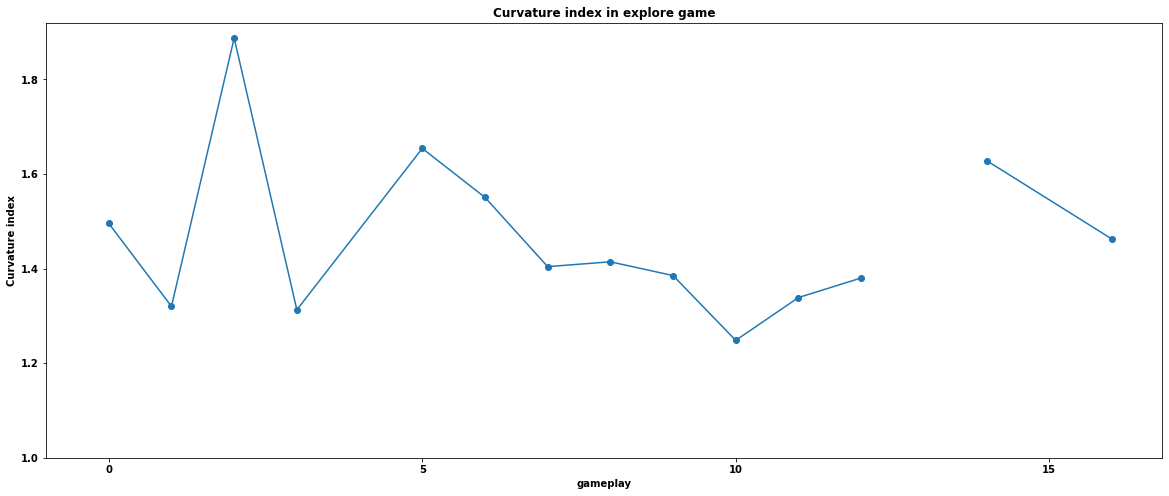

In [83]:
plt.figure(figsize=(20,8))
plt.plot(explore_curvature['gameplay_nr'], explore_curvature['curvature_idx'], marker='o')
plt.xlim(left=-1);
# plt.ylim(top=3)
plt.ylim(bottom=1)
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
# plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(0.2))
plt.ylabel('Curvature index')
plt.title('Curvature index in explore game')

plt.savefig(main_results_path + '\\curvature_idx_explore.png',bbox_inches = "tight")
plt.show();

##### Plot change in mean curvature index within gameplay

No handles with labels found to put in legend.


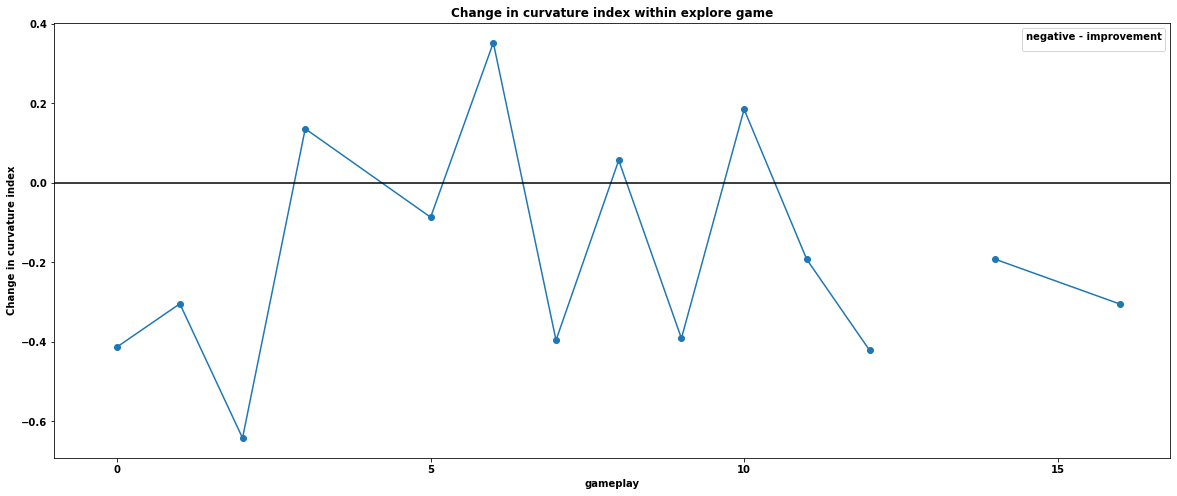

In [84]:
plt.figure(figsize=(20,8))
plt.plot(explore_curvature['gameplay_nr'], explore_curvature['curvature_idx_change'], marker='o')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlim(left=-1);
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
# plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(0.2))
plt.ylabel('Change in curvature index')
plt.legend(title='negative - improvement')
plt.title('Change in curvature index within explore game')

plt.savefig(main_results_path + '\\curvature_idx_change_explore.png',bbox_inches = "tight")
plt.show();

In [85]:
# save df to csv
pd.DataFrame(Kx_parameters).to_csv('./data/P' + patientid + '_Kx_parameters.csv')

#### Calculate theoretical stiffness values

In [86]:
def plot_k_theory(tset):
    plt.figure(figsize=(8,5))
    abs(tset['k_theory']).plot(label='theoretical Kx')
    tset['KxGain'].plot(label='actual Kx'); 
    plt.xlabel('target nr')
    plt.ylabel('stiffness')
    plt.title('Player = {}, Comparison between theoretical and actual stiffness values: gameplay nr={}, Game=explore'.format(patientid, gameplay),fontsize=12)
    plt.legend()
    

In [87]:
## Calculate theoretical Kx for explore game
## act as a standalone cell, if necessary
list_of_kager = []
for gameplay, df in enumerate(df_gameplay):
    game=0
    if game in df['GameID'].unique():
        df_game = df[df['GameID']==0]
        df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
        df_game['TimeStampMS_diff'] = df_game['TimeStampMS'].diff()
        
        ## define repeats
        df_game['VisualTargetXCoord_diff'] = df_game['VisualTargetXCoord'].diff()
        visual1 = df_game[df_game['VisualTargetXCoord_diff']!=0][['VisualTargetXCoord']].iloc[1:,:].reset_index().drop(columns=['index'])
        df_game['TargetXCoord_diff'] = df_game['TargetXCoord'].diff()
        target1 = df_game[df_game['TargetXCoord_diff']!=0][['tsec','TargetXCoord']][:-1].reset_index().drop(columns=['index'])
        target_visual = pd.merge(target1,visual1,left_index=True, right_index=True).fillna(0)
                   
        kager_pre = df_game[df_game['TargetXCoord_diff']!=0][['tsec','Sparc','KxGain']].reset_index().drop(columns=['index']).fillna(0)
        kager = pd.merge(target_visual,kager_pre,on='tsec')

        gamma = 0.05
        alpha = 15
        beta = 1.0
        mu_star = 1.6491
        sigma_star = 0.2038
        delta = 1.5
        n = 5
        kager['KxGain'] = abs(kager['KxGain'])
        kager['mu_k'] = 0
        kager['mu_k'] = kager['Sparc'].rolling(5).mean()
        kager['e_k'] = ((abs(kager['mu_k'])-mu_star)/(delta*sigma_star))-1
        kager['e_k'] = kager['e_k'].clip(lower=-8,upper=8)
        kager['e_k_diff'] = kager['e_k'].diff()
        kager = kager.fillna(0)

        k_theory=[]
        for i in range(0,len(kager['KxGain'])):
            if i<5:
                # irrespective of KxGain = +200
                KxGain_new = kager['KxGain'].iloc[i]
                k_theory.append(KxGain_new)
            else:
                if KxGain_new > 0:
                    gamma = 0.05
                else:
                    gamma = 0
                KxGain_new = (1-gamma)*KxGain_new + alpha*kager['e_k'].iloc[i] + beta*kager['e_k_diff'].iloc[i]
#                 k_theory.append(min(abs(KxGain_new),2000))
                k_theory.append(np.clip(KxGain_new,-2000,2000))

        kager['k_theory'] = k_theory
        kager['gameplay'] = gameplay
        list_of_kager.append(kager)

#         # plot
#         plot_k_theory(kager)
        
# #         # save fig
# #         # note this will overwrite previously saved fig 
#         results_path = os.path.join('data', 'results', patientid, 'theoretical_kx')
#         if not os.path.exists(results_path):
#             os.makedirs(results_path)
#         plt.savefig(results_path + '\\fig{}-explore.png'.format(gameplay))
#         plt.show();

##### Range of theoretical stiffness values

In [88]:
gameplay_nr = []
kager_mean = []
kager_std = []
for nr, kager in enumerate(list_of_kager):
    gameplay_nr.append(list_of_kager[nr]['gameplay'][0])
    kager_mean.append(list_of_kager[nr]['k_theory'].mean())
    kager_std.append(list_of_kager[nr]['k_theory'].std())


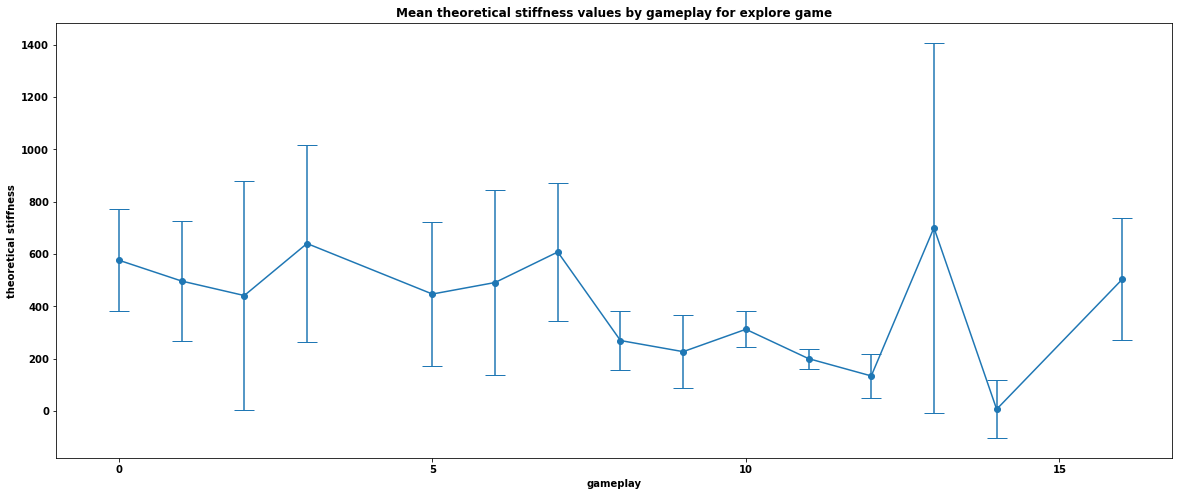

In [89]:
plt.figure(figsize=(20,8))
plt.errorbar(gameplay_nr, kager_mean,kager_std, marker='o', capsize=10)
plt.xlim(left=-1);
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('theoretical stiffness')
plt.title('Mean theoretical stiffness values by gameplay for explore game')

plt.savefig(main_results_path + '\\kager_explore.png',bbox_inches = "tight")
plt.show();

##### Curve fitting

In [90]:
# plot polyfit curve k_theory
def plot_k_theory_real(df_kager):
    '''this function plots the calculated stiffness values and the fitted curve'''
    gameplay = df_kager['gameplay'][0]
    plt.figure(figsize=(8,5))
    plt.plot(df_kager['k_theory'])
    plt.plot(df_kager.index,p(df_kager.index),'r-');
    plt.xlabel('target nr')
    plt.ylabel('stiffness')
    plt.title('Curve fitting of stiffness values: gameplay nr={}, Game=explore'.format(gameplay),fontsize=12)
    plt.show();

In [91]:
K_f = []
kager_median = []
kager_MAD = []
for nr, kager in enumerate(list_of_kager):
    # determine change in median and MAD
    x_0 = np.hstack(np.array_split(kager['k_theory'],20)[1:3])
    x_last = np.hstack(np.array_split(kager['k_theory'],20)[16:18])
    median_0 = np.median(x_0)
    MAD_0 = scipy.stats.median_abs_deviation(x_0)
    median_last = np.median(x_last)
    MAD_last = scipy.stats.median_abs_deviation(x_last)
    
    median_diff = median_last - median_0
    MAD_diff = MAD_last - MAD_0
    kager_median.append(median_diff)
    kager_MAD.append(MAD_diff)
    
    # determine and plot polyfit 
    z = np.polyfit(kager.index,kager['k_theory'], 20)
    p = np.poly1d(z)
    kager['curve_fit'] = np.polyval(z,kager.index)
    
    # calculate K_f
    K_f.append(kager['curve_fit'].iloc[-1])
    
#     # plot
#     plot_k_theory_real(kager) 

##### Over gameplay performance
<br> **Final K_f values**

No handles with labels found to put in legend.


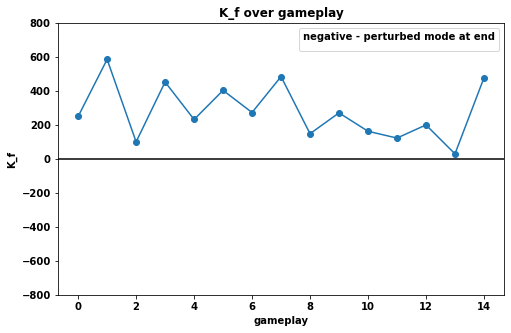

In [92]:
# plot final stiffness value final K_f over gameplays
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(K_f), marker='o')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('gameplay')
plt.ylabel('K_f')
plt.ylim([-800,800])
plt.title('K_f over gameplay',fontsize=12)
plt.legend(title='negative - perturbed mode at end')

plt.savefig(main_results_path + '\\final_theoretical_Kx.png',bbox_inches = "tight")
plt.show();

##### Within gameplay performance (using median and MAD values)
<br> **Over repeatn/targets performance**
<br> **median and MAD values**

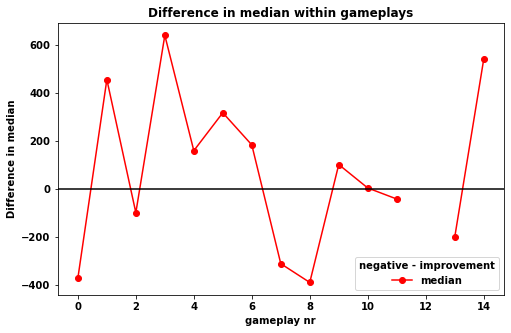

In [93]:
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(kager_median),color='red',marker='o',label='median')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('gameplay nr')
plt.ylabel('Difference in median')
plt.title('Difference in median within gameplays',fontsize=12)
plt.legend(title='negative - improvement')

plt.savefig(main_results_path + '\\theoretical_Kx_median.png',bbox_inches = "tight")
plt.show();

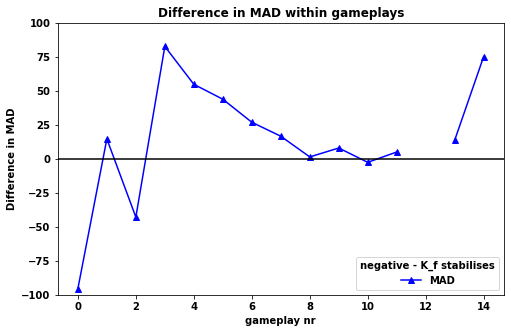

In [94]:
plt.figure(figsize=(8,5))
plt.plot(pd.DataFrame(kager_MAD),color='blue',marker='^',label='MAD')
plt.axhline(y=0, color='black',linestyle='-')
plt.xlabel('gameplay nr')
plt.ylabel('Difference in MAD')
plt.ylim([-100,100])
plt.title('Difference in MAD within gameplays',fontsize=12)
plt.legend(title='negative - K_f stabilises')

plt.savefig(main_results_path + '\\theoretical_Kx_MAD.png',bbox_inches = "tight")
plt.show();

##### Correlation between initial K_f vs change in K_f

In [95]:
# in EDA_summary

**export kager_df to csv**

In [96]:
kager_dict = {
    'gameplay_nr': gameplay_nr,
    'kager_mean': kager_mean,
    'kager_std': kager_std,
    'K_f' : K_f,
    'kager_median' : kager_median,
    'kager_MAD' : kager_MAD,
}

In [97]:
# save df to csv
pd.DataFrame(kager_dict).to_csv('./data/P' + patientid + '_kager.csv')

#### Drone game analysis: Coord and damping force

In [99]:
# damping_mat = np.array([[tset['BxGain'],tset['BxyGain']],[tset['ByxGain'],tset['ByGain']]])   # damping matrix
gameplay_nr = []
curvature_idx = []
F_damp_mean = []
F_damp_std = []

for gameplay, df in enumerate(df_gameplay):
    D_Fx = []
    D_Fy = [] 
    F_damp = []
    
    game=2 # analysis only for drone game
    if game in df['GameID'].unique():
        df_game = df[df['GameID']==2]
        df_game['tsec'] = df_game[['TimeStampMS']].diff().cumsum(axis=0)/1000
        df_game['TimeStampMS_diff'] = df_game['TimeStampMS'].diff()
        
        ## determine repeats
        df_game['VisualTargetXCoord_diff'] = df_game['VisualTargetXCoord'].diff()
     
        # NO assumption is that VisualTarget is delayed by one phase 
        visual = df_game[df_game['VisualTargetXCoord_diff']!=0][['tsec','VisualTargetXCoord','VisualTargetYCoord']].reset_index().drop(columns=['index']).fillna(0)   

        # calculate direct distance 
        visual['direct_dist'] = np.nan
        visual['dist'] = np.nan
        for nr in range(0,len(visual['tsec'])):
            if nr != (len(visual['tsec'])-1):
                df_drone = df_game[(df_game['tsec']>=visual.iloc[nr]['tsec']) & (df_game['tsec']<=visual.iloc[nr+1]['tsec'])]
        #     else:
        #         if (visual.iloc[nr]['tsec'] != df_game['tsec'].iloc[-1]):
        #             df_drone = df_game[(df_game['tsec']>=visual.iloc[nr]['tsec']) & (df_game['tsec']<=df_game['tsec'].iloc[-1])]

                df_drone[['tsec_diff','x_diff','y_diff']]=df_drone[['tsec','XCoordinate','YCoordinate']].diff()
                df_drone['step_size'] = np.sqrt(df_drone['x_diff']**2+df_drone['y_diff']**2)
                visual['dist'].iloc[nr] = df_drone['step_size'].sum() 
                # math.hypot(x2 - x1, y2 - y1)
                visual['direct_dist'].iloc[nr] = math.hypot(visual['VisualTargetXCoord'].iloc[nr+1] - visual['VisualTargetXCoord'].iloc[nr], visual['VisualTargetYCoord'].iloc[nr+1] - visual['VisualTargetYCoord'].iloc[nr])

            visual['curvature_idx'] = visual['dist']/ visual['direct_dist']
        
        # does not take into account 1st value     
        curvature_idx.append(visual['curvature_idx'][1:].mean())
        
        
        ## calculate damping force
        for i in range(0,len(df_game['BxGain'])):
            # no change in damping matrix within gameplay
            BxGain = df_game['BxGain'].iloc[0]
            BxyGain = df_game['BxyGain'].iloc[0]
            ByxGain = df_game['ByxGain'].iloc[0]
            ByGain = df_game['ByGain'].iloc[0]
            d = np.array([[BxGain,BxyGain],[ByxGain,ByGain]]) 
            
            VelocityX = df_game['VelocityX'].iloc[i]
            VelocityY = df_game['VelocityY'].iloc[i]
            v = np.array([VelocityX,VelocityY])
            
            Dx, Dy = d.dot(v)
            D_Fx.append(Dx)
            D_Fy.append(Dy)
            F_damp.append(math.sqrt(Dx ** 2 + Dy ** 2))
            
        gameplay_nr.append(gameplay)
        df_game['D_Fx'] = D_Fx
        df_game['D_Fy'] = D_Fy
        df_game['F_damp'] = F_damp
        F_damp_mean.append(df_game['F_damp'].mean())
        F_damp_std.append(df_game['F_damp'].std())
        
        # put in F_damp_parameters df
        F_damp_parameters = pd.DataFrame(gameplay_nr,columns=['gameplay_nr'])  
        F_damp_parameters['F_damp_mean'] = F_damp_mean
        F_damp_parameters['F_damp_std'] = F_damp_std
        
        # put in curvature_idx df
        curvature = pd.DataFrame(gameplay_nr,columns=['gameplay_nr'])  
        curvature['curvature_idx'] = curvature_idx
        

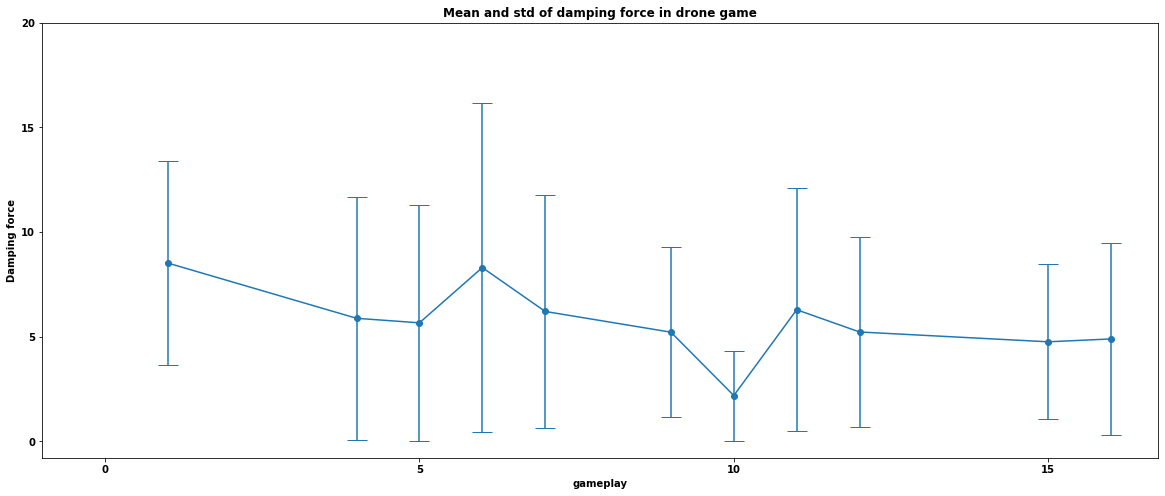

In [100]:
plt.figure(figsize=(20,8)) 
plt.errorbar(F_damp_parameters['gameplay_nr'], F_damp_parameters['F_damp_mean'], F_damp_parameters['F_damp_std'], marker='o', capsize=10)
plt.xlim(left=-1);
plt.ylim(top=20)
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('Damping force')
plt.title('Mean and std of damping force in drone game')

plt.savefig(main_results_path + '\\F_damp_drone.png',bbox_inches = "tight")
plt.show();

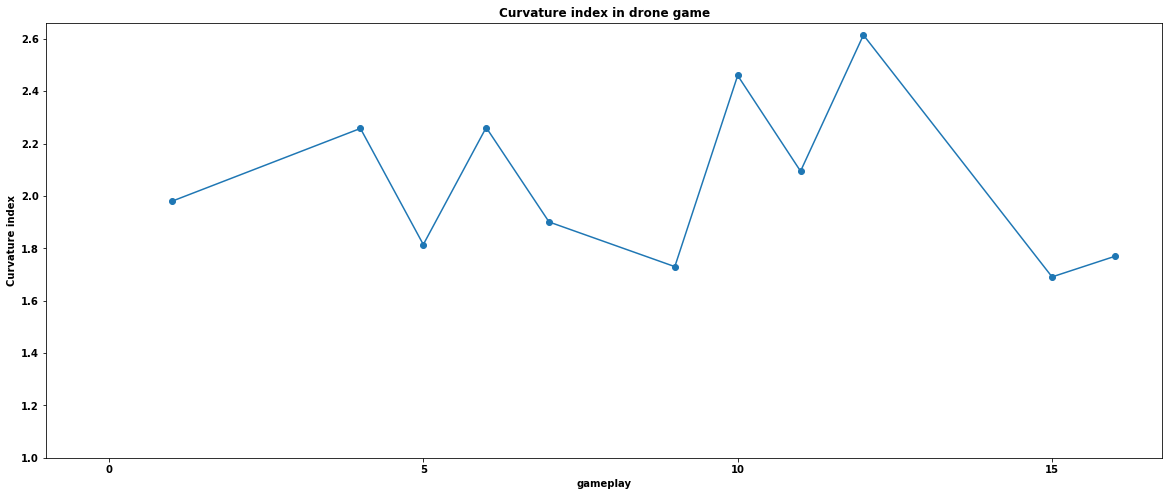

In [101]:
plt.figure(figsize=(20,8)) 
plt.plot(curvature['gameplay_nr'], curvature['curvature_idx'], marker='o')
plt.xlim(left=-1);
# plt.ylim(top=3)
plt.ylim(bottom=1)
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(0.2))
plt.ylabel('Curvature index')
plt.title('Curvature index in drone game')

plt.savefig(main_results_path + '\\curvature_idx_drone.png',bbox_inches = "tight")
plt.show();

#### Kxx parameters

In [102]:
# Kx_parameters 

In [103]:
Kx_parameters['total_time'] = Kx_parameters['Kx_Atime'] + Kx_parameters['Kx_Ptime']
Kx_parameters['A_fractiontime'] = Kx_parameters['Kx_Atime']/Kx_parameters['total_time']
Kx_parameters['P_fractiontime'] = Kx_parameters['Kx_Ptime']/Kx_parameters['total_time']

In [104]:
Kx_parameters.rename(columns={'A_fractiontime': 'in A mode',
                    'P_fractiontime': 'in P mode'}, inplace=True)
Kx_parameters = Kx_parameters.set_index(['gameplay_nr'])

In [105]:
A_fractiontime = Kx_parameters['in A mode'].mean()
P_fractiontime = Kx_parameters['in P mode'].mean()
print(f'Player{patientid} spent a mean fraction of {A_fractiontime:.3f} in assistive mode and {P_fractiontime:.3f} in perturbed mode')

Player001 spent a mean fraction of 0.695 in assistive mode and 0.305 in perturbed mode


In [106]:
# split data to quadrants
# time spent in assistive mode in first/last quadrant
A_time_q0 = np.array_split(Kx_parameters['in A mode'],4)[0].mean()
A_time_q3 = np.array_split(Kx_parameters['in A mode'],4)[3].mean()

# time spent in perturbed mode in first/last quadrant
P_time_q0 = np.array_split(Kx_parameters['in P mode'],4)[0].mean()
P_time_q3 = np.array_split(Kx_parameters['in P mode'],4)[3].mean()

print(f'Player{patientid} spent in first quadrant, a mean fraction time of {A_time_q0:.3f} in assistive mode and {P_time_q0:.3f} in perturbed mode')
print(f'Player{patientid} spent in last quadrant, a mean fraction time of {A_time_q3:.3f} in assistive mode and {P_time_q3:.3f} in perturbed mode')
print(f'So from first to last quadrant, player{patientid} has a difference mean fraction time of {(A_time_q3-A_time_q0):.3f} in assistive mode and {(P_time_q3-P_time_q0):.3f} in perturbed mode')

Player001 spent in first quadrant, a mean fraction time of 0.604 in assistive mode and 0.396 in perturbed mode
Player001 spent in last quadrant, a mean fraction time of 0.844 in assistive mode and 0.156 in perturbed mode
So from first to last quadrant, player001 has a difference mean fraction time of 0.240 in assistive mode and -0.240 in perturbed mode


In [107]:
# # save to outputs file
# with open(main_results_path + '\\outputs.txt', mode='a') as file_:
#     file_.write(f'Player{patientid} spent a mean fraction of {A_fractiontime:.3f} in assistive mode and {P_fractiontime:.3f} in perturbed mode')
#     file_.write("\n")  # Next line.
#     file_.write(f'Player{patientid} spent in first quadrant, a mean fraction time of {A_time_q0:.3f} in assistive mode and {P_time_q0:.3f} in perturbed mode')
#     file_.write("\n")  # Next line.
#     file_.write(f'Player{patientid} spent in last quadrant, a mean fraction time of {A_time_q3:.3f} in assistive mode and {P_time_q3:.3f} in perturbed mode')
#     file_.write("\n")  # Next line.
#     file_.write(f'So from first to last quadrant, player{patientid} has a difference mean fraction time of {(A_time_q3-A_time_q0):.3f} in assistive mode and {(P_time_q3-P_time_q0):.3f} in perturbed mode')
#     file_.write("\n")  # Next line.

##### Plot fraction of time spent in A-P modes

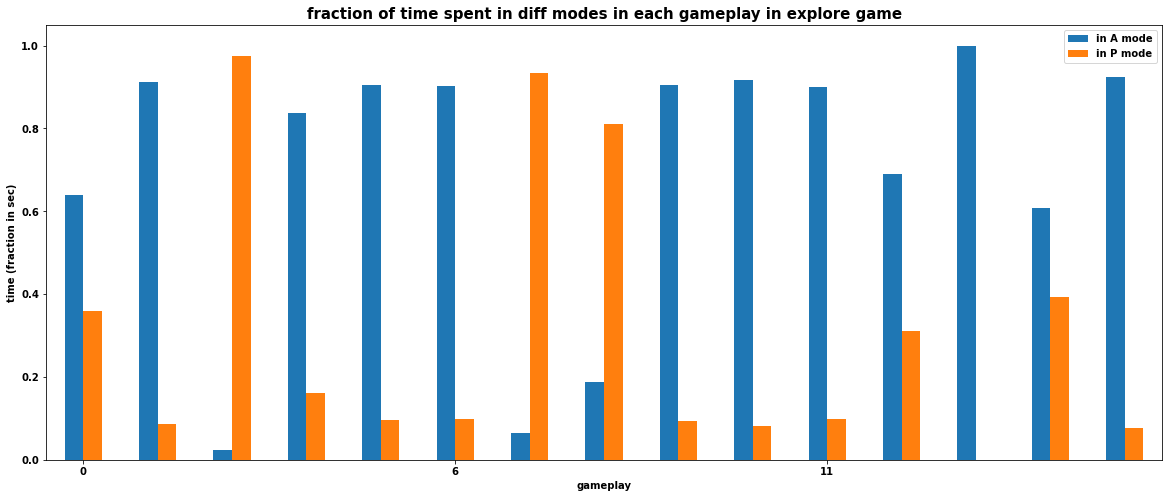

In [108]:
# plt.figure(figsize=(20,8))
# plt.bar(Kx_parameters['gameplay_nr'],Kx_parameters['in A mode'],Kx_parameters['in P mode'])
Kx_parameters.drop(columns=['game_nr','Kx_Atime','Kx_Ptime','total_time','kx_mean','kx_std','Kx_range','Kx_r_q3','repeatn','help_mode']).plot.bar(figsize=(20,8))
plt.xlabel('gameplay')
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('time (fraction in sec)');
plt.title('fraction of time spent in diff modes in each gameplay in explore game',fontsize=15);

plt.savefig(main_results_path + '\\fraction_time_modes.png',bbox_inches = "tight")
plt.show();

##### Plot range of stiffness values

In [109]:
Kx_parameters.reset_index(inplace=True)

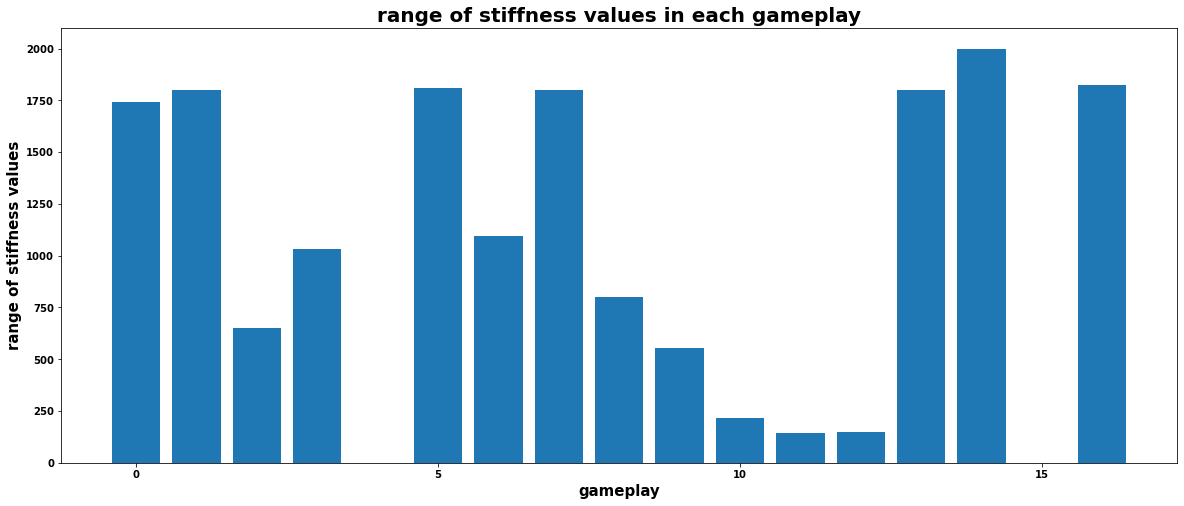

In [110]:
plt.figure(figsize=(20,8))
plt.bar(Kx_parameters['gameplay_nr'],Kx_parameters['Kx_range'])
plt.xlabel('gameplay',fontsize=15)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('range of stiffness values',fontsize=15);
plt.title('range of stiffness values in each gameplay',fontsize=20);

plt.savefig(main_results_path + '\\Kx_range.png',bbox_inches = "tight")
plt.show();

##### Plot mean Kx stiffness coeff
only for explore game

In [111]:
# Kx_parameters.reset_index(inplace=True)

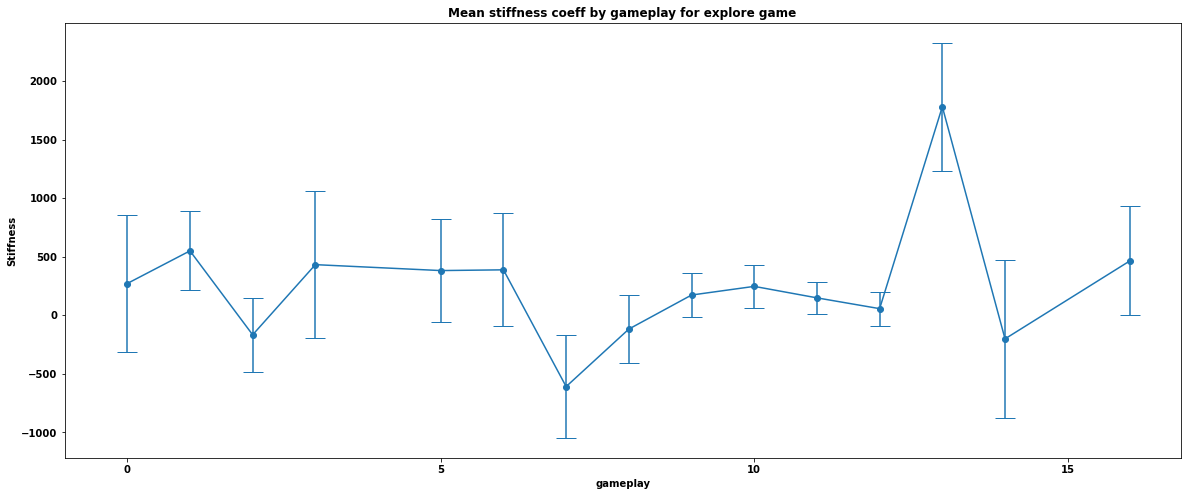

In [112]:
plt.figure(figsize=(20,8))
plt.errorbar(Kx_parameters['gameplay_nr'],Kx_parameters['kx_mean'],Kx_parameters['kx_std'], marker='o', capsize=10)
plt.xlim(left=-1);
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('Stiffness')
plt.title('Mean stiffness coeff by gameplay for explore game')

plt.savefig(main_results_path + '\\Kx_explore.png',bbox_inches = "tight")
plt.show();

##### Plot median of last quadrant of stiffness values

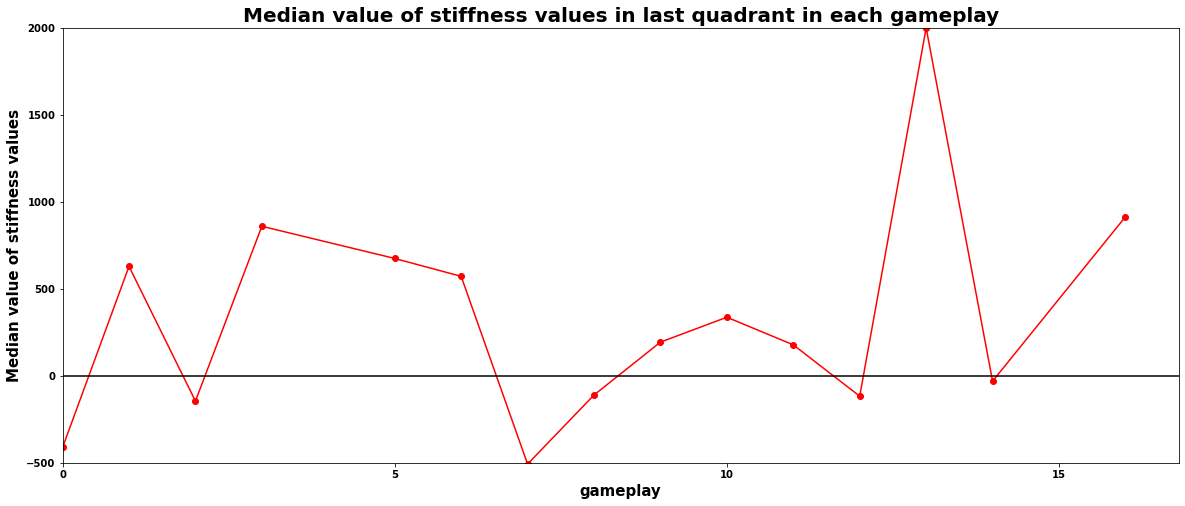

In [113]:
plt.figure(figsize=(20,8))
plt.plot(Kx_parameters['gameplay_nr'],Kx_parameters['Kx_r_q3'],color='red',marker='o')
plt.xlabel('gameplay',fontsize=15)
plt.xticks(rotation=0)
plt.xlim(left=0)
plt.ylim([-500,2000])
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.axhline(y=0, color='black', linestyle='-')
plt.ylabel('Median value of stiffness values',fontsize=15);
plt.title('Median value of stiffness values in last quadrant in each gameplay',fontsize=20);

plt.savefig(main_results_path + '\\Kx_median_lastquad.png',bbox_inches = "tight")
plt.show();

##### Nr of help modes

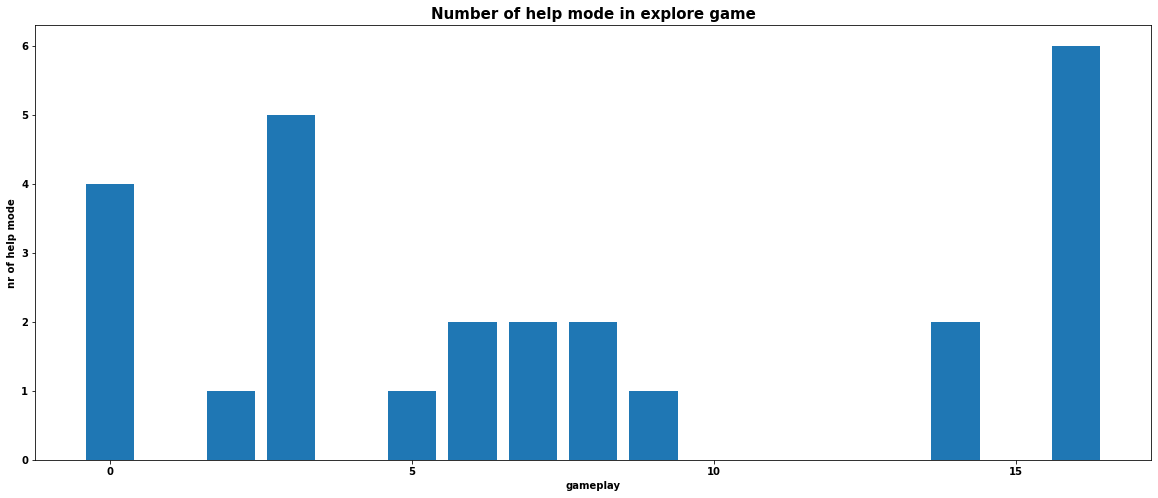

In [114]:
plt.figure(figsize=(20,8))
plt.bar(Kx_parameters['gameplay_nr'],Kx_parameters['help_mode']);
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylabel('nr of help mode')

plt.title('Number of help mode in explore game',fontsize=15);

plt.savefig(main_results_path + '\\help_mode_nr.png', bbox_inches = "tight")
plt.show();

#### Mean/std of Force parameters

In [115]:
# F_parameters

##### Plot Force deficit (ratio)

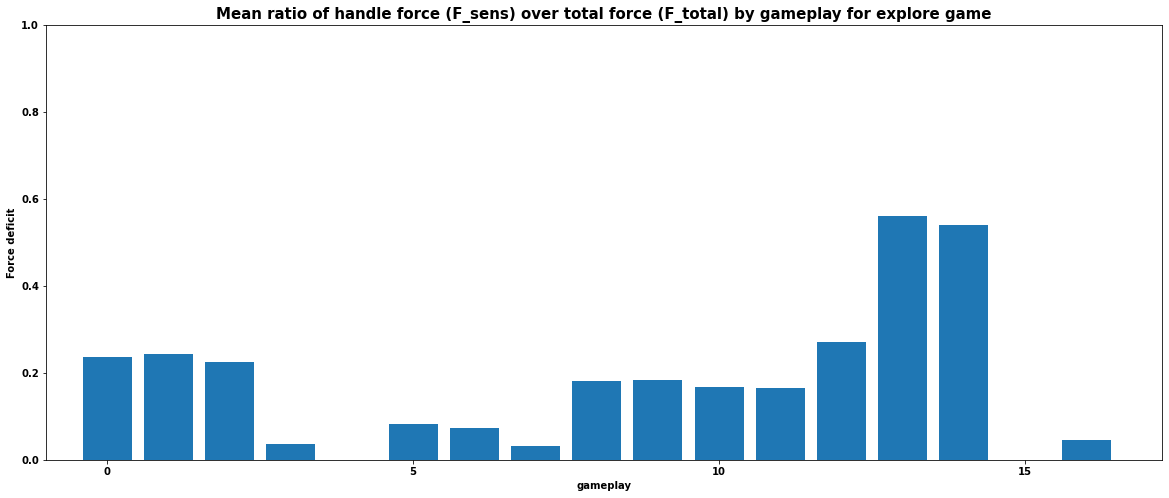

In [116]:
plt.figure(figsize=(20,8))
# plt.errorbar(F_parameters['gameplay_nr'],F_parameters['F_deficit_mean'],F_parameters['F_deficit_std'], marker='o', capsize=10);
plt.bar(F_parameters['gameplay_nr'],F_parameters['F_deficit_mean'])
plt.xlabel('gameplay')
plt.ylim(top=1)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.xlim(left=-1)
plt.ylabel('Force deficit')

plt.title('Mean ratio of handle force (F_sens) over total force (F_total) by gameplay for explore game',fontsize=15);

plt.savefig(main_results_path + '\\force_deficit_explore.png',bbox_inches = "tight")
plt.show();

##### Plot percentage of time where F_total>maximum force (21N)

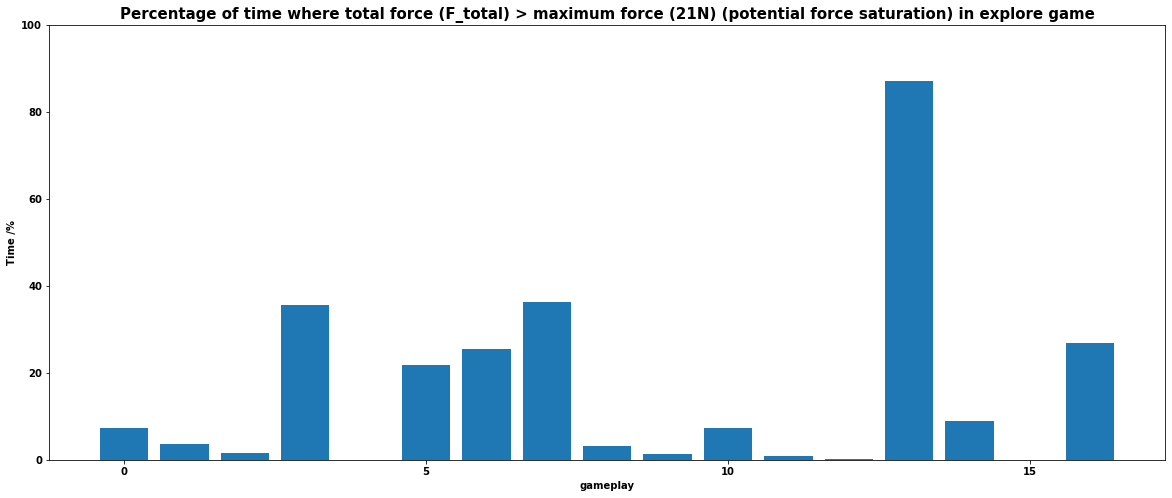

In [117]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['gameplay_nr'],F_parameters['Ftot_21']);
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('Time /%')
plt.ylim(top=100)
plt.title('Percentage of time where total force (F_total) > maximum force (21N) (potential force saturation) in explore game',fontsize=15);

plt.savefig(main_results_path + '\\forcetotal_larger21.png', bbox_inches = "tight")
plt.show();

##### Plot percentage of time where F_sens>maximum force (21N)

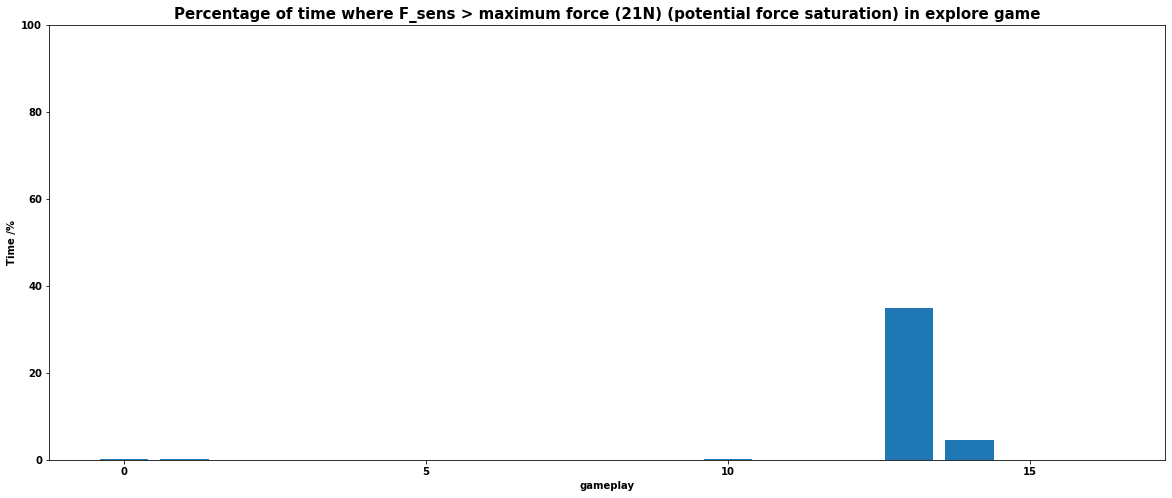

In [118]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['gameplay_nr'],F_parameters['Fsens_21']);
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('Time /%')
plt.ylim(top=100)
plt.title('Percentage of time where F_sens > maximum force (21N) (potential force saturation) in explore game',fontsize=15);

plt.savefig(main_results_path + '\\forcesens_larger21.png', bbox_inches = "tight")
plt.show();

##### Plot percentage of time where F_spring>maximum force (21N)

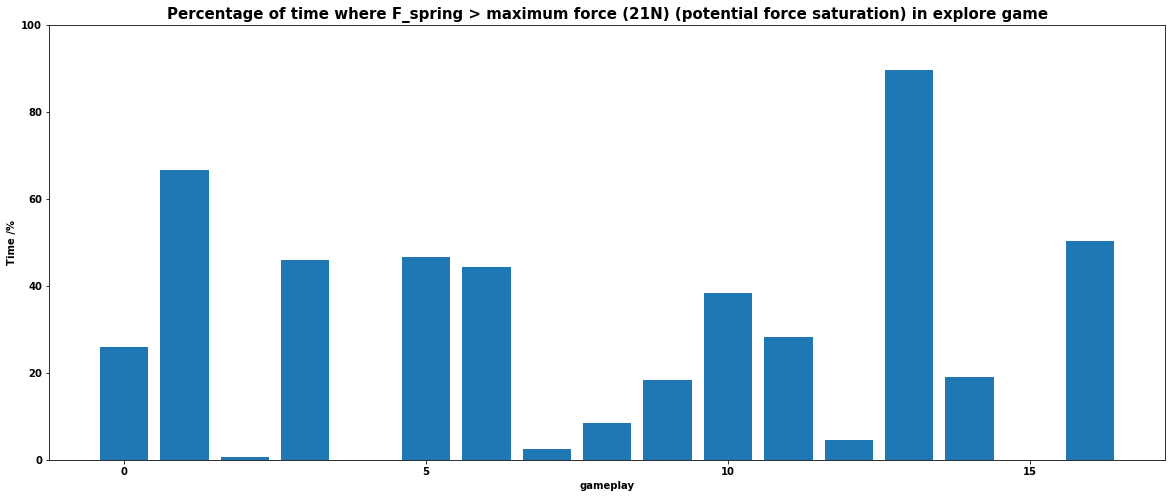

In [119]:
plt.figure(figsize=(20,8))
plt.bar(F_parameters['gameplay_nr'],F_parameters['Fspring_21']);
plt.xlabel('gameplay')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.ylabel('Time /%')
plt.ylim(top=100)
plt.title('Percentage of time where F_spring > maximum force (21N) (potential force saturation) in explore game',fontsize=15);

plt.savefig(main_results_path + '\\forcespring_larger21.png', bbox_inches = "tight")
plt.show();

In [120]:
%chime print(f'total run time = {datetime.now()-start_codes}')

total run time = 0:08:26.995778
